In [87]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import json
from typing import Union, List
import matplotlib.patches as mpatches
import scipy.stats as stats
import numpy as np
from scipy.stats import shapiro

sns.set_palette("pastel")
%matplotlib inline

## 1. Laden des Rohdatensatzes

### 1.1 Laden der Frage-Codes

Zur besseren Verarbeitung der Datensätze werden die zugehörigen Codes der Fragen geladen und verwendet. 

In [1]:
with open('code.json', 'r') as f:
  code_data = json.load(f)

In [2]:
df_code = pd.DataFrame(code_data)
codes = df_code["Variable"].tolist()

In [3]:
df_code.head()

Variable    Fragetyp                                   Fragetext  \
0  60371597  Skalafrage                     2.1 ein hohes Einkommen   
1  60371598  Skalafrage             2.2 gute Aufstiegsmöglichkeiten   
2  60371599  Skalafrage             2.3 einen sicheren Arbeitsplatz   
3  60371600  Skalafrage      2.4 viele Kontakte zu anderen Menschen   
4  60371601  Skalafrage  2.5 eine gute/kollegiale Arbeitsatmosphäre   

                                               Werte Zeichenlimit  Wert  
0  {'<leer>': 'Ungültig / Keine Antwort', '1': 'u...         None  None  
1  {'<leer>': 'Ungültig / Keine Antwort', '1': 'u...         None  None  
2  {'<leer>': 'Ungültig / Keine Antwort', '1': 'u...         None  None  
3  {'<leer>': 'Ungültig / Keine Antwort', '1': 'u...         None  None  
4  {'<leer>': 'Ungültig / Keine Antwort', '1': 'u...         None  None

### 1.2 Laden der Stichproben Ergebnisse

Die Stichproben Ergebnisse werden in ein DataFrame geladen und die Spaltenüberschriften (Fragetexte) mit ihren jeweiligen Codes ersetzt.

In [4]:
df_results_raw = pd.read_excel('./data/pia_master_raw.xlsx', index_col=0)

In [5]:
print(len(codes))
print(len(df_results_raw.columns))

53
55


In [6]:
df_results_raw.head()

ein hohes Einkommen  gute Aufstiegsmˆglichkeiten  \
Bogen                                                     
1                        4                            4   
2                        4                            5   
3                        4                            2   
4                        5                            4   
5                        5                            4   

       einen sicheren Arbeitsplatz  viele Kontakte zu anderen Menschen†  \
Bogen                                                                     
1                                5                                    4   
2                                5                                    5   
3                                5                                    4   
4                                5                                    4   
5                                5                                    3   

       eine gute/kollegiale Arbeitsatmosph‰re†  das Gef¸hl, etwas zu leisten†  \
Bogen                                                                           
1                                            4                              5   
2                                            5                              4   
3                                            5                              4   
4                                            4                              4   
5                                            5                              5   

       das Gef¸hl, anerkannt zu werden†  \
Bogen                                     
1                                     5   
2                                     5   
3                                     5   
4                                     4   
5                                     4   

       Mˆglichkeiten, sich um andere Menschen zu k¸mmern  \
Bogen                                                      
1                                                      4   
2                                                      4   
3                                                      2   
4                                                      2   
5                                                      3   

       Mˆglichkeiten, eigene Ideen einzubringen†  \
Bogen                                              
1                                              4   
2                                              4   
3                                              4   
4                                              3   
5                                              4   

       Mˆglichkeiten, etwas N¸tzliches f¸r die Gesellschaft zu tun†  ...  \
Bogen                                                                ...   
1                                                      4             ...   
2                                                      2             ...   
3                                                      2             ...   
4                                                      3             ...   
5                                                      3             ...   

       an Gott glauben†  \
Bogen                     
1                     2   
2                     1   
3                     2   
4                     1   
5                     1   

       die Vielfalt der Menschen anerkennen und respektieren  \
Bogen                                                          
1                                                      5       
2                                                      5       
3                                                      3       
4                                                      5       
5                                                      4       

       Bitte kreuze an, welcher Generation du zugehˆrig bist:  \
Bogen                                                           
1                                                      2        
2                                           

In [6]:
df_results = df_results_raw.rename(columns={
    col: codes[i] for i, col in enumerate(df_results_raw.columns) if col not in ["Bogen", 
                                                                             "Zeitstempel",
                                                                             "Datensatz-Ursprung"]})

In [7]:
df_results.head()

60371597  60371598  60371599  60371600  60371601  60371602  60371603  \
Bogen                                                                         
1             4         4         5         4         4         5         5   
2             4         5         5         5         5         4         5   
3             4         2         5         4         5         4         5   
4             5         4         5         4         4         4         4   
5             5         4         5         3         5         5         4   

       60371604  60371605  60371606  ...  60371647  60371648  60371649  \
Bogen                                ...                                 
1             4         4         4  ...         2         5         2   
2             4         4         2  ...         1         5         1   
3             2         4         2  ...         2         3         1   
4             2         3         3  ...         1         5         1   
5             3         4         3  ...         1         4         1   

      60371650  60371651  60371652  60371653  60371654  \
Bogen                                                    
1          2.0         6         1       1.0       3.0   
2          2.0         6         1       1.0       2.0   
3          1.0         4         1       1.0       3.0   
4          2.0         4         1       2.0       3.0   
5          2.0         5         1       1.0       3.0   

                  Zeitstempel  Datensatz-Ursprung  
Bogen                                              
1      02.07.2023 um 17:44:14                   O  
2      02.07.2023 um 17:50:50                   O  
3      02.07.2023 um 18:55:10                   M  
4      02.07.2023 um 19:00:41                   M  
5      02.07.2023 um 19:03:32                   M  

[5 rows x 55 columns]

### 1.3. Utility Functions

In [8]:
def get_answer_text(question_code: str, answer_res: Union[float, int, str] = None):
    if isinstance(answer_res, str):
        _res = answer_res
    else:
        _res = int(answer_res) if answer_res != 0 else '<leer>'
    t_code = df_code[df_code["Variable"] == question_code]
    question_type = t_code["Fragetyp"].values[0]
    assert (answer_res is not None and question_type != 'Offene Frage') or (answer_res is None and question_type == 'Offene Frage'), f"Ungültige Antwortmöglichkeit für Fragentyp {question_type}"
    answer_dict = t_code["Werte"].values[0]
    out = answer_dict[str(_res)] if answer_res is not None else answer_dict
    return out

In [9]:
def get_question_text(question_code: str):
    return df_code[df_code["Variable"] == question_code]["Fragetext"].values[0]

In [10]:
get_question_text('60371598')

'2.2 gute Aufstiegsmöglichkeiten'

In [11]:
get_answer_text('60371654', 0.0)

'Ungültig / Keine Antwort'

## 2. Deskriptive Beschreibung der Stichproben Gesamtheit

Im ersten Schritte werden fehlende Werte ausgewertet.

<Axes: >

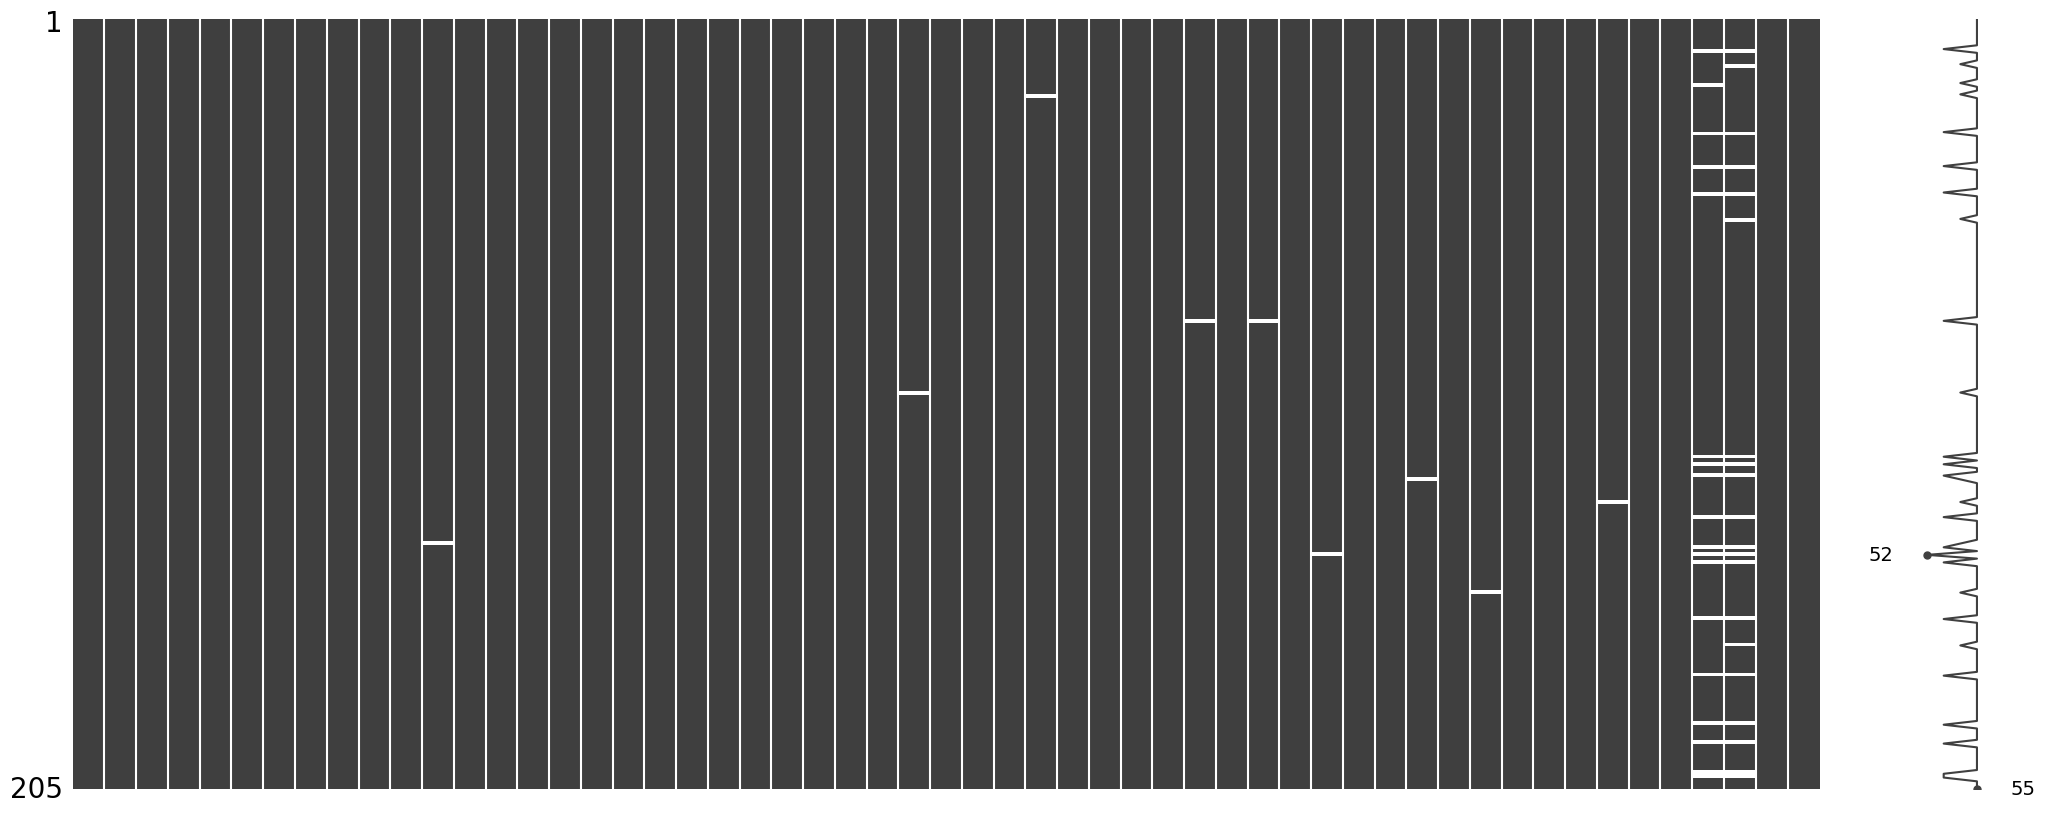

In [12]:
msno.matrix(df_results)

Füllen der fehlenden Werte mit Nullen

In [13]:
df_results.fillna(0, inplace=True)

In [114]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   60371597            205 non-null    int64  
 1   60371598            205 non-null    int64  
 2   60371599            205 non-null    int64  
 3   60371600            205 non-null    int64  
 4   60371601            205 non-null    int64  
 5   60371602            205 non-null    int64  
 6   60371603            205 non-null    int64  
 7   60371604            205 non-null    int64  
 8   60371605            205 non-null    int64  
 9   60371606            205 non-null    int64  
 10  60371607            205 non-null    int64  
 11  60371608            205 non-null    float64
 12  60371609            205 non-null    int64  
 13  60371612            205 non-null    object 
 14  60371613            205 non-null    int64  
 15  60371614            205 non-null    int64  
 16  60371615     

In [115]:
df_results.describe()

60371597    60371598    60371599    60371600    60371601    60371602  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     3.970732    3.653659    4.439024    3.629268    4.653659    4.160976   
std      0.625537    0.955915    0.749143    0.959535    0.561902    0.759540   
min      2.000000    1.000000    1.000000    1.000000    1.000000    2.000000   
25%      4.000000    3.000000    4.000000    3.000000    4.000000    4.000000   
50%      4.000000    4.000000    5.000000    4.000000    5.000000    4.000000   
75%      4.000000    4.000000    5.000000    4.000000    5.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

        60371603    60371604    60371605    60371606  ...    60371645  \
count  205.00000  205.000000  205.000000  205.000000  ...  205.000000   
mean     4.15122    3.097561    3.912195    3.478049  ...    4.073171   
std      0.82934    1.129048    0.908618    0.988044  ...    0.773021   
min      1.00000    1.000000    1.000000    1.000000  ...    2.000000   
25%      4.00000    2.000000    4.000000    3.000000  ...    4.000000   
50%      4.00000    3.000000    4.000000    4.000000  ...    4.000000   
75%      5.00000    4.000000    5.000000    4.000000  ...    5.000000   
max      5.00000    5.000000    5.000000    5.000000  ...    5.000000   

         60371646    60371647    60371648    60371649    60371650    60371651  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     3.121951    1.824390    4.243902    1.604878    1.556098    4.990244   
std      0.999880    1.166691    0.923030    0.675173    0.526759    1.150406   
min      0.000000    1.000000    1.000000    1.000000    0.000000    1.000000   
25%      2.000000    1.000000    4.000000    1.000000    1.000000    4.000000   
50%      3.000000    1.000000    4.000000    1.000000    2.000000    5.000000   
75%      4.000000    2.000000    5.000000    2.000000    2.000000    6.000000   
max      5.000000    5.000000    5.000000    3.000000    3.000000    6.000000   

         60371652    60371653    60371654  
count  205.000000  205.000000  205.000000  
mean     1.082927    1.239024    2.414634  
std      0.276447    0.697642    0.922901  
min      1.000000    0.000000    0.000000  
25%      1.000000    1.000000    2.000000  
50%      1.000000    1.000000    3.000000  
75%      1.000000    2.000000    3.000000  
max      2.000000    4.000000    3.000000  

[8 rows x 52 columns]

### 2.1. Gliederung der Fragetypen

Die Umfrage enthält 3 Fragetypen.
- Skalafragen - Antwortmöglichkeiten werden mittels kategorischen numerischen Werten auf einer Ordinalskala dargestellt.
- 1 aus n - Antwortmöglichkeiten werden mittels kategorischen numerischen Werten auf einer Nominalskala dargestellt.
- Offene Frage - Antwort besteht aus einem Freitext

In [30]:
skala_ids = df_code[df_code["Fragetyp"] == "Skalafrage"]["Variable"].tolist()
one_of_n_ids = df_code[df_code["Fragetyp"] == "1 aus n"]["Variable"].tolist()
numeric_ids = skala_ids + one_of_n_ids
open_q_ids = df_code[df_code["Fragetyp"] == "Offene Frage"]["Variable"].tolist()

Neben den fachlichen Fragen der Umfrage, gibt es auch Fragetypen, welche zur Klassifierung der Umfrage Ergebnisse dienen.
- Bitte kreuze an, welcher Generation du zugehörig bist
- Welchem Geschlecht fühlst du dich zugehörig?
- Bitte wähle deinen höchsten formalen Bildungsabschluss aus:
- Bist du derzeit berufstätig?
- In welcher Beschäftigungsform befindest du dich?
- In welchem Wirtschaftssektor bist du beschäftigt?

In [18]:
generation_col = '60371649'
gender_col = '60371650'
academic_col = '60371651'
working_col = '60371652'
work_form_col = '60371653'
economic_sector_col = '60371654'

In [128]:
skala_fach_ids = [x for x in skala_ids if int(x) <= 60371648]
one_of_n_fach_ids = [x for x in one_of_n_ids if int(x) <= 60371648]
num_fach_cols = skala_fach_ids + one_of_n_fach_ids

print(skala_fach_ids)
print(one_of_n_fach_ids)

['60371597', '60371598', '60371599', '60371600', '60371601', '60371602', '60371603', '60371604', '60371605', '60371606', '60371607', '60371608', '60371609', '60371615', '60371616', '60371617', '60371618', '60371619', '60371620', '60371624', '60371625', '60371626', '60371627', '60371628', '60371629', '60371630', '60371631', '60371632', '60371633', '60371634', '60371635', '60371636', '60371637', '60371638', '60371639', '60371640', '60371641', '60371642', '60371643', '60371644', '60371645', '60371646', '60371647', '60371648']
['60371613', '60371614']


In [19]:
print(skala_ids)
print(one_of_n_ids)

['60371597', '60371598', '60371599', '60371600', '60371601', '60371602', '60371603', '60371604', '60371605', '60371606', '60371607', '60371608', '60371609', '60371615', '60371616', '60371617', '60371618', '60371619', '60371620', '60371624', '60371625', '60371626', '60371627', '60371628', '60371629', '60371630', '60371631', '60371632', '60371633', '60371634', '60371635', '60371636', '60371637', '60371638', '60371639', '60371640', '60371641', '60371642', '60371643', '60371644', '60371645', '60371646', '60371647', '60371648']
['60371613', '60371614', '60371649', '60371650', '60371651', '60371652', '60371653', '60371654']


In [129]:
for col in num_fach_cols:
    print(f"{col}: {get_question_text(col)}")

60371597: 2.1 ein hohes Einkommen
60371598: 2.2 gute Aufstiegsmöglichkeiten
60371599: 2.3 einen sicheren Arbeitsplatz
60371600: 2.4 viele Kontakte zu anderen Menschen
60371601: 2.5 eine gute/kollegiale Arbeitsatmosphäre
60371602: 2.6 das Gefühl, etwas zu leisten
60371603: 2.7 das Gefühl, anerkannt zu werden
60371604: 2.8 Möglichkeiten, sich um andere Menschen zu kümmern
60371605: 2.9 Möglichkeiten, eigene Ideen einzubringen
60371606: 2.10 Möglichkeiten, etwas Nützliches für die Gesellschaft zu tun
60371607: 2.11 die Möglichkeit, etwas zu tun, das ich sinnvoll ﬁnde
60371608: 2.12 genügend Freizeit neben der Berufstätigkeit
60371609: 2.13 Flexible Arbeitszeiten (z.B. Home-Ofﬁce oder Gleitzeit)
60371615: 4.1 Größe des Unternehmens
60371616: 4.2 Ruf des Unternehmens
60371617: 4.3 Standort des Unternehmens
60371618: 4.4 Bereitstellung neuster Technologien am Arbeitsplatz
60371619: 4.5 Flache Hierarchien (auf Augenhöhe miteinander arbeiten)
60371620: 4.6 Nachhaltigkeit  Corporate Social Resp

### 2.2. Visualisierung der Grundgesamtheit

Verteilung der Gesamtanzahl der Umfrageergebnisse auf die unterschiedlichen Generationen.

In [116]:
gen_count = df_results[generation_col].value_counts()
print(gen_count)

60371649
1    103
2     80
3     22
Name: count, dtype: int64


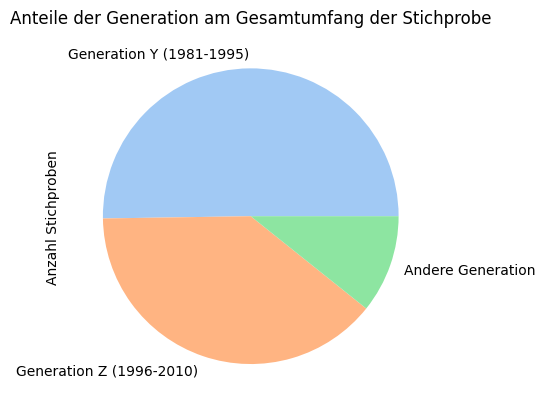

In [117]:
fig = gen_count.plot(kind='pie', labels=["Generation Y (1981-1995)", "Generation Z (1996-2010)", "Andere Generation"])
plt.ylabel("Anzahl Stichproben")
plt.title("Anteile der Generation am Gesamtumfang der Stichprobe")
plt.show(fig)

Verteilung der Gesamtanzahl der Umfrageergebnisse auf die unterschiedlichen Generationen unter Betrachtung von Geschelcht, Ausbildungsgrad bzw. Arbeitsverhältnis.

In [123]:
def plt_classes_bar(input_df: pd.DataFrame, col_code: str, title: str):
    plt.figure(figsize=(10,5))
    fig = sns.countplot(data=df_results, x=generation_col, hue=col_code)
    plt.xlabel("Generationen")
    fig.axes.set_xticklabels(labels=[get_answer_text(generation_col, x) for x in sorted(df_results[generation_col].unique())])
    plt.ylabel("Anzahl")
    plt.title(title)
    plt.legend(labels=[get_answer_text(col_code, x) for x in sorted(df_results[col_code].unique())])
    plt.show(fig)

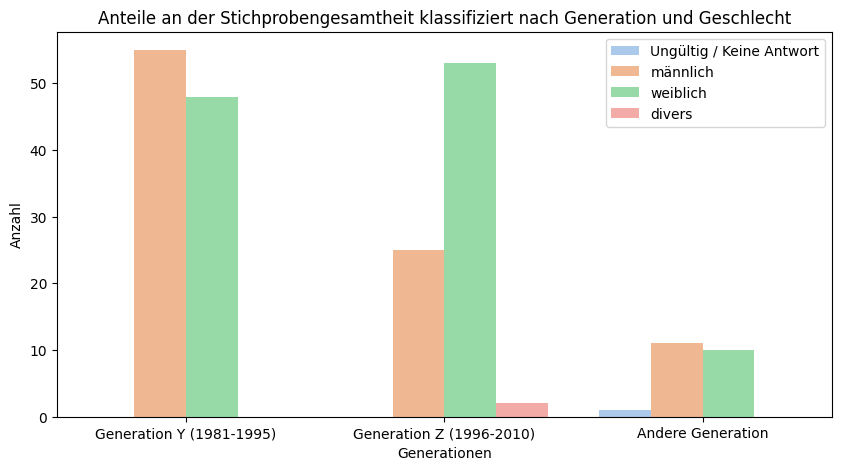

In [124]:
plt_classes_bar(df_results, gender_col, "Anteile an der Stichprobengesamtheit klassifiziert nach Generation und Geschlecht")

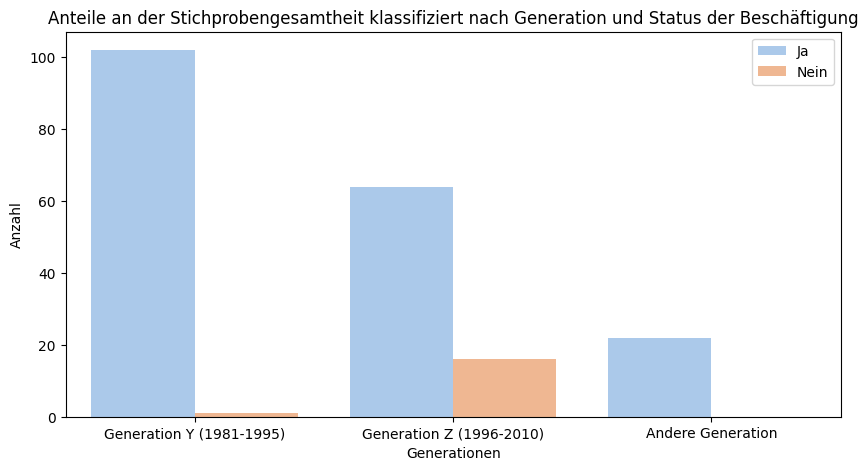

In [125]:
plt_classes_bar(df_results, working_col, "Anteile an der Stichprobengesamtheit klassifiziert nach Generation und Status der Beschäftigung")

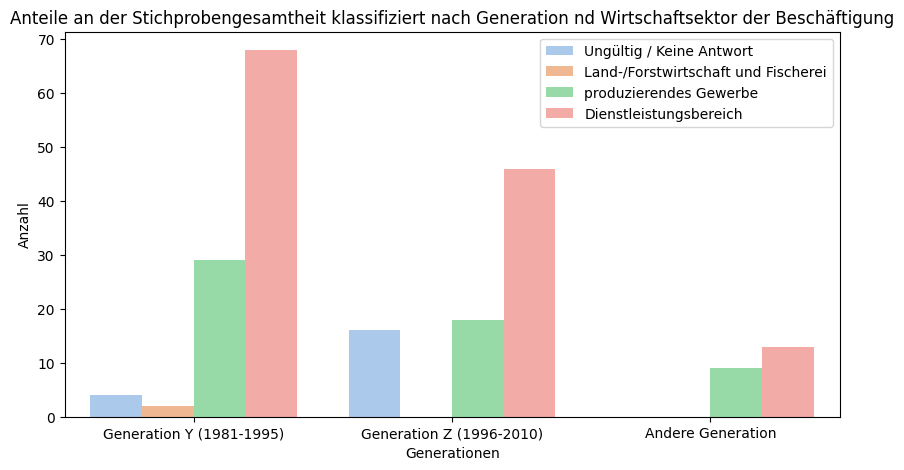

In [126]:
plt_classes_bar(df_results, economic_sector_col, "Anteile an der Stichprobengesamtheit klassifiziert nach Generation nd Wirtschaftsektor der Beschäftigung")

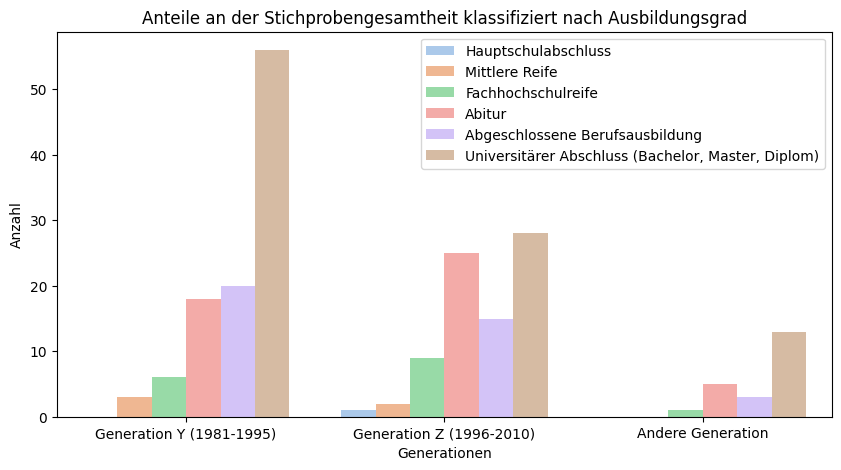

In [127]:
plt_classes_bar(df_results, academic_col, "Anteile an der Stichprobengesamtheit klassifiziert nach Ausbildungsgrad")

### 2.3. Kreuztabellen

**Kreuztabellen**, auch **Kontingenztafeln** genannt, werden in der deskriptiven Statistik verwendet um einen Überblick über zwei, meist kategorischen Variablen zu bekommen. In der Kreuztabelle kann dann abgelesen werden, wie oft die Kombination der Ausprägungen zweier Merkmale vorkommt. 

In [81]:
pd.crosstab(index=[df_results[generation_col], df_results[gender_col]], columns='Count')

col_0              Count
60371649 60371650       
1        1.0          55
         2.0          48
2        1.0          25
         2.0          53
         3.0           2
3        0.0           1
         1.0          11
         2.0          10

### 2.4. Statistische Test auf Normalverteilung und Varianzhomogenität

#### 2.4.1 Prüfen auf Normalverteilung

**Shapiro-Wilk-Test**

Der Shapiro-Wilk-Test ist ein statistischer Signifikanztest, der die Hypothese überprüft, dass die zugrunde liegende Grundgesamtheit einer Stichprobe normalverteilt ist.

Die Nullhypothese H 0 nimmt an, dass eine Normalverteilung der Grundgesamtheit vorliegt. Demgegenüber unterstellt die Alternativhypothese H 1, dass keine Normalverteilung gegeben ist. Wenn der Wert der Teststatistik W größer ist als der kritische Wert W kritisch, wird die Nullhypothese nicht abgelehnt und es wird angenommen, dass eine Normalverteilung vorliegt.

Wird alternativ der p p-Wert des Tests ermittelt, so wird die Nullhypothese in der Regel nicht abgelehnt, wenn der p-Wert größer ist als das festgelegte Signifikanzniveau α. 

/Users/johanna/Git/piaMaster/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


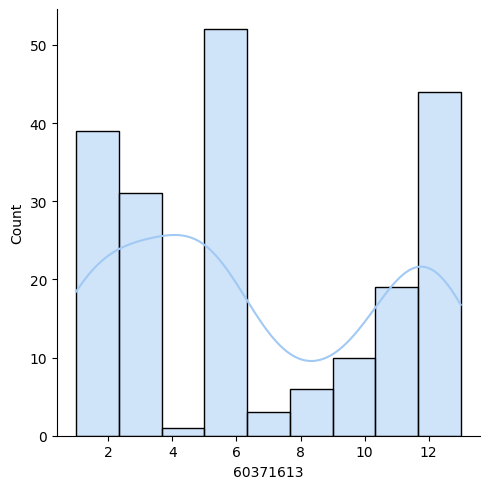

In [85]:
sns.displot(df_results['60371613'], kde=True)

In [109]:
def get_shapiro_df(input: pd.DataFrame, question_ids: List[str]):
    out_df = pd.DataFrame(columns=["question_id", 
                                   "statistic", 
                                   "pvalue", 
                                   "statistic_gen_y", 
                                   "pvalue_gen_y", 
                                   "statistic_gen_z", 
                                   "pvalue_gen_z",
                                   "statistic_other_gen",
                                   "pvalue_other_gen"])
    for question_code in question_ids:
        gen_y = df_results[df_results[generation_col] == 1][question_code] 
        gen_z = df_results[df_results[generation_col] == 2][question_code]
        other_gen = df_results[df_results[generation_col] == 3][question_code]
        
        shap_stat = stats.shapiro(df_results[question_code])
        shap_stat_y = stats.shapiro(gen_y)
        shap_stat_z = stats.shapiro(gen_z)
        shap_stat_other = stats.shapiro(other_gen)
        
        tmp = pd.DataFrame([{"question_id": question_code, 
                             "statistic": shap_stat.statistic, 
                             "pvalue": shap_stat.pvalue,
                             "statistic_gen_y": shap_stat_y.statistic, 
                             "pvalue_gen_y": shap_stat_y.pvalue,
                             "statistic_gen_z": shap_stat_z.statistic, 
                             "pvalue_gen_z": shap_stat_z.pvalue,
                             "statistic_other_gen": shap_stat_other.statistic, 
                             "pvalue_other_gen": shap_stat_other.pvalue}])
        out_df = pd.concat([out_df, tmp], ignore_index=True)
    return out_df

In [150]:
shapiro_df = get_shapiro_df(df_results, skala_ids)

In [151]:
shapiro_df

question_id  statistic        pvalue  statistic_gen_y  pvalue_gen_y  \
0     60371597   0.678606  1.548612e-19         0.695289  2.578402e-13   
1     60371598   0.870125  3.038942e-12         0.861978  2.361730e-08   
2     60371599   0.698980  6.020192e-19         0.714393  7.352662e-13   
3     60371600   0.878962  9.372937e-12         0.883374  1.817371e-07   
4     60371601   0.596015  1.132329e-21         0.648118  2.333418e-14   
5     60371602   0.773237  1.651119e-16         0.785183  5.804416e-11   
6     60371603   0.773231  1.650219e-16         0.796761  1.297232e-10   
7     60371604   0.911803  1.073536e-09         0.908910  2.838677e-06   
8     60371605   0.836987  6.740441e-14         0.813919  4.526298e-10   
9     60371606   0.897807  1.261341e-10         0.901753  1.262444e-06   
10    60371607   0.784709  4.413632e-16         0.782113  4.712894e-11   
11    60371608   0.716469  2.041763e-18         0.718326  9.178721e-13   
12    60371609   0.787939  5.861284e-16         0.751756  6.632923e-12   
13    60371615   0.883177  1.635649e-11         0.880362  1.346148e-07   
14    60371616   0.795756  1.179907e-15         0.764971  1.524743e-11   
15    60371617   0.823208  1.620867e-14         0.823746  9.583022e-10   
16    60371618   0.868201  2.394693e-12         0.837508  2.871403e-09   
17    60371619   0.821827  1.411313e-14         0.820939  7.714052e-10   
18    60371620   0.869906  2.957528e-12         0.896303  6.962752e-07   
19    60371624   0.800094  1.754263e-15         0.776587  3.254843e-11   
20    60371625   0.797722  1.411216e-15         0.758014  9.799759e-12   
21    60371626   0.891364  5.017273e-11         0.877191  9.861094e-08   
22    60371627   0.884221  1.881254e-11         0.874869  7.875690e-08   
23    60371628   0.759607  5.373958e-17         0.775658  3.060407e-11   
24    60371629   0.901340  2.125385e-10         0.886012  2.372797e-07   
25    60371630   0.896328  1.017422e-10         0.888136  2.949038e-07   
26    60371631   0.803013  2.298756e-15         0.815901  5.254665e-10   
27    60371632   0.854279  4.565460e-13         0.836523  2.649402e-09   
28    60371633   0.900606  1.905079e-10         0.904077  1.636236e-06   
29    60371634   0.783491  3.969131e-16         0.772415  2.471426e-11   
30    60371635   0.705702  9.565680e-19         0.704829  4.325528e-13   
31    60371636   0.847162  2.040179e-13         0.846611  6.133483e-09   
32    60371637   0.848598  2.395208e-13         0.851943  9.694745e-09   
33    60371638   0.735195  8.044586e-18         0.734885  2.392552e-12   
34    60371639   0.871845  3.768083e-12         0.858675  1.754143e-08   
35    60371640   0.561350  1.802672e-22         0.634440  1.214031e-14   
36    60371641   0.573239  3.342113e-22         0.656289  3.477630e-14   
37    60371642   0.895098  8.521686e-11         0.900178  1.060976e-06   
38    60371643   0.838406  7.843270e-14         0.833405  2.057723e-09   
39    60371644   0.854543  4.706198e-13         0.838455  3.103228e-09   
40    60371645   0.825087  1.959335e-14         0.824892  1.047731e-09   
41    60371646   0.892018  5.499943e-11         0.888529  3.070905e-07   
42    60371647   0.723668  3.430793e-18         0.629573  9.662799e-15   
43    60371648   0.758809  5.039577e-17         0.796552  1.278263e-10   

    statistic_gen_z  pvalue_gen_z  statistic_other_gen  pvalue_other_gen  
0          0.612590  3.284593e-13             0.786606      3.110655e-04  
1          0.860196  3.619222e-07             0.866716      6.804316e-03  
2          0.619651  4.408647e-13             0.766998      1.590919e-04  
3          0.869462  7.752865e-07             0.886086      1.581720e-02  
4          0.453304  9.887250e-16             0.701933      2.071160e-05  
5          0.767838  6.549990e-10             0.683166      1.204270e-05  
6          0.717621  4.145603e-11             0.824009      1.218625e-03  
7          0.906282  2.266148e-05             0.920651      7.841737e-02

#### 2.4.2 Prüfen der Varianzhomogenität

**Levene-Test**

Ein Levene-Test (in Form eines F-Test) prüft basierend auf der F-Verteilung, ob zwischen zwei oder mehr Gruppen unterschiedliche Varianzen vorliegen oder Varianzgleichheit zwischen ihnen existiert. Hierbei sollten die Gruppen keine stark unterschiedlichen Größen haben, da die F-Statistik für den Test sonst verzerrt ist. Die Nullhypothese lautet, dass sie gleiche Varianzen besitzen. Die Alternativhypothese demzufolge entsprechend, dass sie unterschiedliche Varianzen besitzen.

In [104]:
def get_levene_df(input: pd.DataFrame, question_ids: List[str]):
    out_df = pd.DataFrame(columns=["question_id", "statistic", "pvalue"])
    for question_code in question_ids:
        gen_y = df_results[df_results[generation_col] == 1][question_code] 
        gen_z = df_results[df_results[generation_col] == 2][question_code]
        other_gen = df_results[df_results[generation_col] == 3][question_code]
        
        l_stat = stats.levene(gen_y, gen_z, other_gen, center='median')
        
        tmp = pd.DataFrame([{"question_id": question_code, "statistic": l_stat.statistic, "pvalue": l_stat.pvalue}])
        
        out_df = pd.concat([out_df, tmp], ignore_index=True)
    return out_df     

In [105]:
get_levene_df(df_results, skala_ids)

question_id  statistic    pvalue
0     60371597   1.061178  0.347969
1     60371598   0.329652  0.719560
2     60371599   0.983352  0.375838
3     60371600   0.196510  0.821750
4     60371601   2.040662  0.132613
5     60371602   0.331414  0.718298
6     60371603   3.509426  0.031751
7     60371604   1.262127  0.285274
8     60371605   2.197841  0.113691
9     60371606   1.252227  0.288077
10    60371607   2.857765  0.059720
11    60371608   0.889350  0.412526
12    60371609   0.250762  0.778450
13    60371615   0.050200  0.951051
14    60371616   0.267690  0.765416
15    60371617   0.100427  0.904496
16    60371618   0.615170  0.541558
17    60371619   2.133487  0.121085
18    60371620   0.930733  0.395949
19    60371624   0.444293  0.641903
20    60371625   0.847818  0.429867
21    60371626   0.242643  0.784779
22    60371627   0.169249  0.844418
23    60371628   3.034749  0.050285
24    60371629   2.670089  0.071690
25    60371630   0.435637  0.647459
26    60371631   0.707862  0.493915
27    60371632   0.299432  0.741568
28    60371633   1.187004  0.307253
29    60371634   0.864878  0.422656
30    60371635   0.088979  0.914901
31    60371636   0.099604  0.905241
32    60371637   0.035858  0.964783
33    60371638   0.475239  0.622430
34    60371639   0.021482  0.978750
35    60371640   2.149504  0.119200
36    60371641   0.692588  0.501464
37    60371642   0.142736  0.867070
38    60371643   0.972965  0.379725
39    60371644   0.117021  0.889627
40    60371645   1.364594  0.257829
41    60371646   0.021951  0.978290
42    60371647   2.182785  0.115379
43    60371648   0.708111  0.493792

### 2.5. Korrelationskoeffizienten, Rangkoeffizenten, ...

**Pearson**

Der Korrelationskoeffizient nach Pearson kann Werte von -1 bis 1 annehmen und wird durch r symbolisiert. Bei einem Wert von 0 ist zwar keine lineare Abhängigkeit gegeben, die einzelnen Merkmale können jedoch in nichtlinearer Weise voneinander abhängen. Die Werte 1 und -1 stellen sogenannte perfekte Korrelationen dar: In beiden Fällen verändern sich beide Variablen in demselben Maße, allerdings in verschiedenen Richtungen.

Der Korrelationskoeffizient r ist das Ergebnis der Korrelationsanalyse. Bei dieser handelt es sich um ein statistisches Verfahren, das den Zusammenhang zwischen zwei Variablen erläutert. Der Korrelationskoeffizient enthält Informationen über die Stärke ebenso wie über die Richtung des Zusammenhangs. Wenn der Wert einer Variable steigt bzw. fällt, tut es auch der Wert der anderen Variable.

In [84]:
df_results[skala_ids].corr()

60371597  60371598  60371599  60371600  60371601  60371602  \
60371597  1.000000  0.261690  0.048476 -0.009999 -0.168443 -0.082891   
60371598  0.261690  1.000000 -0.115200  0.174641 -0.032765  0.218946   
60371599  0.048476 -0.115200  1.000000  0.029772  0.118440  0.047487   
60371600 -0.009999  0.174641  0.029772  1.000000  0.288009  0.277342   
60371601 -0.168443 -0.032765  0.118440  0.288009  1.000000  0.315045   
60371602 -0.082891  0.218946  0.047487  0.277342  0.315045  1.000000   
60371603  0.046369  0.122037  0.010969  0.249432  0.186572  0.459209   
60371604 -0.100048  0.058712  0.192525  0.540324  0.339412  0.398879   
60371605 -0.237406  0.179279 -0.072718  0.294206  0.237783  0.439655   
60371606 -0.199325  0.098308  0.165404  0.306775  0.326172  0.452170   
60371607 -0.160636  0.156155 -0.007767  0.200250  0.232132  0.483779   
60371608  0.128112 -0.109630  0.284069  0.022347  0.114800 -0.154400   
60371609  0.101423  0.028476  0.025893  0.052940  0.032805  0.009171   
60371615  0.209133  0.162380 -0.020929  0.092955 -0.118530 -0.106906   
60371616  0.056597  0.237541  0.115158  0.212330  0.117080  0.274490   
60371617 -0.084094 -0.140032  0.218598  0.024910  0.144875  0.016524   
60371618  0.012193  0.193476  0.062039  0.161819  0.096504  0.232713   
60371619 -0.086461  0.118281  0.097875  0.219004  0.298104  0.140782   
60371620 -0.117034  0.092005  0.101991  0.138578  0.113635  0.206514   
60371624  0.148836 -0.021372  0.312258 -0.057047  0.054675  0.087673   
60371625  0.418888  0.216313  0.000868 -0.073097 -0.094457 -0.028927   
60371626  0.195357  0.341888 -0.086360  0.070099 -0.130214  0.140610   
60371627 -0.192677  0.089782 -0.023743  0.152183  0.252571  0.372555   
60371628  0.078795 -0.011757  0.538089 -0.019618  0.172020  0.010761   
60371629 -0.222581 -0.030114  0.259404  0.333292  0.213809  0.288253   
60371630  0.048968  0.029062 -0.017642  0.011262 -0.054560  0.002013   
60371631  0.072217  0.300516  0.135113  0.151989  0.116669  0.410124   
60371632 -0.001806 -0.027452  0.063856  0.113842  0.127367  0.072570   
60371633 -0.200172  0.048034 -0.038770  0.192289  0.143270  0.083777   
60371634  0.182712  0.107885  0.102372  0.114560  0.136312  0.010821   
60371635  0.095633  0.128313 -0.102546  0.158328 -0.001532  0.159221   
60371636  0.131313 -0.144878  0.137249  0.002262  0.034869 -0.039784   
60371637  0.145040 -0.100709  0.227280 -0.091122 -0.054124 -0.104224   
60371638  0.095366 -0.133461  0.338864 -0.030053  0.059650 -0.017004   
60371639 -0.053738 -0.018658  0.151410 -0.104348  0.060993  0.034748   
60371640  0.044007  0.016780  0.146090  0.074834  0.119985  0.009239   
60371641 -0.002034  0.035078  0.097162  0.076482  0.209859  0.241526   
60371642 -0.087588  0.038724  0.056212  0.531125  0.239336  0.188982   
60371643  0.134645  0.132607  0.146174  0.059168  0.038493  0.204305   
60371644 -0.101810 -0.082525  0.153861  0.164648  0.312919  0.100833   
60371645  0.115962  0.180406  0.062763 -0.042554  0.081200  0.130120   
60371646 -0.135338  0.044407  0.085234  0.139322  0.066820  0.283846   
60371647  0.013073 -0.002058  0.183987  0.077302  0.033886  0.170351   
60371648 -0.233782  0.001762  0.049969  0.362724  0.239280  0.202428   

          60371603  60371604  60371605  60371606  ...  60371639  60371640  \
60371597  0.046369 -0.100048 -0.237406 -0.199325  ... -0.053738  0.044007   
60371598  0.122037  0.058712  0.179279  0.098308  ... -0.018658  0.016780   
60371599  0.010969  0.192525 -0.072718  0.165404  ...  0.151410  0.146090   
60371600  0.249432  0.540324  0.294206  0.306775  ... -0.104348  0.074834   
60371601  0.186572  0.339412  0.237783  0.326172  ...  0.060993  0.119985   
60371602  0.459209  0.398879  0.439655  0.452170  ...  0.034748  0.009239   
60371603  1.000000  0.224982  0.329953  0.258314  ... -0.013102  0.022968   
60371604  0.224982  1.000000  0.318983  0.533629  ...  0.083860  0.007215   
60371605  0.329953  0.318983  1.000000  0.434662  ... -0.010630  0.034342   

**Spearmann**

Die Rangkorrelationsanalyse nach Spearman berechnet den linearen Zusammenhang zweier mindestens **ordinalskalierter Variablen**.
Da stets der Zusammenhang zwischen zwei Variablen untersucht wird, wird von einem "bivariaten Zusammenhang" gesprochen.

Zwei Variablen hängen dann linear zusammen, wenn sie linear miteinander variieren (also kovariieren). Sie können dies in unterschiedlicher Weise tun:

- Gleichsinnige oder positive Korrelation: Hohe (tiefe) Ausprägungen der einen Variablen gehen mit hohen (tiefen) Ausprägungen der zweiten Variablen einher (Abbildung 1: oben links). Zum Beispiel: Je besser die Mathematiknote eines Lernenden, desto zufriedener ist er mit seiner Leistung. Je schlechter die Mathematiknote, desto geringer ist die Zufriedenheit.
- Gegenläufige oder negative Korrelation: Hohe Werte der einen Variablen gehen mit tiefen Werten der anderen einher (Abbildung 1: oben rechts). Zum Beispiel: Je höher das Medianeinkommen eines Landes ist, desto tiefer ist die Arbeitslosigkeit. Je tiefer das Medianeinkommen ist, desto höher ist die Arbeitslosigkeit.

Auch nicht-lineare Zusammenhänge sind möglich, wie beispielsweise eine u-förmige (Abbildung 1: unten rechts) oder umgekehrt u-förmige Kovariation. Eine Rangkorrelationsanalyse ist jedoch nur bei linearen Zusammenhängen anwendbar.

In [82]:
df_results[skala_ids].corr(method="spearman")

60371597  60371598  60371599  60371600  60371601  60371602  \
60371597  1.000000  0.284183  0.035665 -0.014518 -0.138147 -0.053687   
60371598  0.284183  1.000000 -0.068413  0.191863  0.034438  0.246747   
60371599  0.035665 -0.068413  1.000000  0.045302  0.172318  0.137103   
60371600 -0.014518  0.191863  0.045302  1.000000  0.294759  0.281249   
60371601 -0.138147  0.034438  0.172318  0.294759  1.000000  0.310753   
60371602 -0.053687  0.246747  0.137103  0.281249  0.310753  1.000000   
60371603  0.007448  0.131966  0.085273  0.233102  0.203860  0.393029   
60371604 -0.093635  0.086140  0.212895  0.545911  0.328538  0.371601   
60371605 -0.234460  0.221122 -0.079969  0.266914  0.250888  0.426882   
60371606 -0.188610  0.132255  0.168268  0.314546  0.327825  0.409319   
60371607 -0.125327  0.223694  0.034257  0.202769  0.253457  0.441614   
60371608  0.122356 -0.018841  0.203034  0.044619  0.139394 -0.122748   
60371609  0.086639  0.025400  0.025956  0.085277  0.084441  0.049088   
60371615  0.190528  0.140482 -0.071125  0.093687 -0.053251 -0.060498   
60371616  0.085507  0.206107  0.145849  0.181660  0.150476  0.252721   
60371617 -0.052903 -0.161694  0.202269  0.038476  0.090718  0.001577   
60371618  0.031905  0.179422  0.082302  0.150945  0.133586  0.175952   
60371619 -0.073147  0.144024  0.115434  0.220197  0.366287  0.185964   
60371620 -0.145640  0.088173  0.028154  0.149659  0.148024  0.165552   
60371624  0.101830 -0.014191  0.284573 -0.062909  0.026420  0.082603   
60371625  0.388082  0.222801  0.037994 -0.077067 -0.046404  0.007928   
60371626  0.196722  0.328017 -0.037040  0.080289 -0.045563  0.112900   
60371627 -0.162063  0.116304 -0.004041  0.146930  0.275803  0.388801   
60371628  0.120290  0.016848  0.506164 -0.035397  0.145508  0.052927   
60371629 -0.234857 -0.009319  0.179905  0.338310  0.219589  0.252612   
60371630  0.051674  0.019589  0.021124  0.036668 -0.002951  0.000243   
60371631  0.112981  0.336469  0.181497  0.140366  0.144032  0.384651   
60371632 -0.018765 -0.000283  0.058217  0.078967  0.055312  0.068174   
60371633 -0.174252  0.049685 -0.111321  0.199581  0.096705  0.097664   
60371634  0.195540  0.112498  0.131932  0.122332  0.169232  0.038216   
60371635  0.110339  0.117488 -0.101914  0.145246  0.024307  0.125858   
60371636  0.114339 -0.194931  0.134164 -0.000647  0.011608 -0.075704   
60371637  0.106315 -0.146339  0.178534 -0.069321 -0.085261 -0.103826   
60371638  0.088740 -0.107381  0.297225 -0.006224  0.048611 -0.008535   
60371639 -0.038608 -0.013564  0.105890 -0.095445  0.029657  0.034340   
60371640  0.085562  0.079320  0.177219  0.056505  0.092231 -0.003764   
60371641  0.026306  0.060715  0.118934  0.078418  0.147709  0.157605   
60371642 -0.081140  0.052269  0.062795  0.537205  0.241458  0.184629   
60371643  0.163514  0.168637  0.163229  0.077854  0.063755  0.234011   
60371644 -0.104179 -0.079373  0.182595  0.140371  0.309946  0.105065   
60371645  0.133655  0.165188  0.110044 -0.015001  0.113441  0.112502   
60371646 -0.142661  0.028055  0.067939  0.125117  0.085224  0.210116   
60371647  0.000053  0.015436  0.229073  0.087075  0.031581  0.196328   
60371648 -0.174152  0.085652  0.042049  0.292360  0.188988  0.203740   

          60371603  60371604  60371605  60371606  ...  60371639  60371640  \
60371597  0.007448 -0.093635 -0.234460 -0.188610  ... -0.038608  0.085562   
60371598  0.131966  0.086140  0.221122  0.132255  ... -0.013564  0.079320   
60371599  0.085273  0.212895 -0.079969  0.168268  ...  0.105890  0.177219   
60371600  0.233102  0.545911  0.266914  0.314546  ... -0.095445  0.056505   
60371601  0.203860  0.328538  0.250888  0.327825  ...  0.029657  0.092231   
60371602  0.393029  0.371601  0.426882  0.409319  ...  0.034340 -0.003764   
60371603  1.000000  0.202873  0.287404  0.235758  ...  0.046742  0.048820   
60371604  0.202873  1.000000  0.294656  0.525724  ...  0.095637  0.008337   
60371605  0.287404  0.294656  1.000000  0.411609  ...  0.004970  0.054257   

**Kendall**

Auf dem gleichen Prinzip wie der Rangkorrelationskoeffizient nach Spearman basiert auch der Konkordanzkoeffizient nach Kendall. Für dessen Berechnung müssen daher ebenfalls zunächst die Ränge beider Variablenreihen gebildet werden. Anschließend werden die Daten nach den Rängen einer der beiden Datenreihen geordnet und wiederum überprüft, inwieweit sich die zweite Datenreihe „mitsortiert“ hat. Diese Überprüfung erfolgt anhand des paarweisen Vergleichs der Ränge der zweiten Datenreihe, wobei in konkordante (die natürliche Reihenfolge der Ränge wird eingehalten) und diskordante Paare (die natürliche Reihenfolge der Ränge wird nicht eingehalten) unterschieden wird.

In [83]:
df_results[skala_ids].corr(method="kendall")

60371597  60371598  60371599  60371600  60371601  60371602  \
60371597  1.000000  0.253191  0.033345 -0.012341 -0.132007 -0.049673   
60371598  0.253191  1.000000 -0.062325  0.167405  0.030990  0.221983   
60371599  0.033345 -0.062325  1.000000  0.040380  0.165282  0.127440   
60371600 -0.012341  0.167405  0.040380  1.000000  0.270569  0.252742   
60371601 -0.132007  0.030990  0.165282  0.270569  1.000000  0.294467   
60371602 -0.049673  0.221983  0.127440  0.252742  0.294467  1.000000   
60371603  0.006600  0.117267  0.078170  0.206100  0.192020  0.367532   
60371604 -0.081429  0.074403  0.189629  0.471649  0.295818  0.330808   
60371605 -0.211306  0.191362 -0.071227  0.233116  0.232538  0.389062   
60371606 -0.167146  0.114560  0.150482  0.270830  0.299158  0.370945   
60371607 -0.115878  0.197511  0.031696  0.178770  0.239119  0.413618   
60371608  0.114192 -0.017329  0.190694  0.039692  0.133246 -0.113128   
60371609  0.080848  0.021370  0.023280  0.073406  0.077324  0.043251   
60371615  0.169696  0.120021 -0.063985  0.078945 -0.048372 -0.051810   
60371616  0.078417  0.182102  0.133146  0.157845  0.140639  0.227931   
60371617 -0.047332 -0.141730  0.183155  0.033366  0.083856  0.001150   
60371618  0.027593  0.155615  0.073862  0.131173  0.122719  0.155642   
60371619 -0.066225  0.126394  0.105816  0.191417  0.341912  0.167894   
60371620 -0.129346  0.075067  0.025086  0.128063  0.135280  0.148995   
60371624  0.092441 -0.012462  0.261641 -0.053277  0.024780  0.075137   
60371625  0.359469  0.196478  0.035099 -0.067262 -0.044085  0.007247   
60371626  0.176103  0.284865 -0.033151  0.068624 -0.041741  0.101323   
60371627 -0.146423  0.099673 -0.002969  0.127132  0.250632  0.352473   
60371628  0.111307  0.014254  0.479913 -0.030756  0.137363  0.047660   
60371629 -0.207080 -0.005637  0.159812  0.291797  0.197564  0.225897   
60371630  0.045589  0.016686  0.019067  0.034620 -0.002581  0.000451   
60371631  0.102992  0.295237  0.164716  0.121376  0.133813  0.351564   
60371632 -0.016630 -0.000706  0.052646  0.067573  0.050963  0.059955   
60371633 -0.155414  0.043460 -0.100594  0.168526  0.088512  0.086550   
60371634  0.181493  0.099422  0.122404  0.109288  0.160798  0.034768   
60371635  0.104773  0.106761 -0.097449  0.133283  0.023865  0.119682   
60371636  0.102759 -0.169509  0.122763 -0.000279  0.011083 -0.068029   
60371637  0.097215 -0.129872  0.162885 -0.060680 -0.079052 -0.093198   
60371638  0.082834 -0.096679  0.278585 -0.005144  0.046621 -0.007776   
60371639 -0.033872 -0.011081  0.092554 -0.080757  0.027043  0.031767   
60371640  0.082709  0.072196  0.169392  0.050759  0.090410 -0.003189   
60371641  0.025434  0.054916  0.113247  0.071136  0.144737  0.149692   
60371642 -0.071373  0.045612  0.055881  0.466741  0.219972  0.163778   
60371643  0.148247  0.144066  0.148516  0.067046  0.059862  0.212402   
60371644 -0.093552 -0.068907  0.164985  0.122703  0.287283  0.095180   
60371645  0.121153  0.145220  0.100088 -0.012784  0.106704  0.101786   
60371646 -0.125338  0.023363  0.060655  0.106529  0.076978  0.188403   
60371647 -0.000094  0.013619  0.207010  0.076982  0.029094  0.175707   
60371648 -0.161437  0.075602  0.038911  0.259285  0.177457  0.186317   

          60371603  60371604  60371605  60371606  ...  60371639  60371640  \
60371597  0.006600 -0.081429 -0.211306 -0.167146  ... -0.033872  0.082709   
60371598  0.117267  0.074403  0.191362  0.114560  ... -0.011081  0.072196   
60371599  0.078170  0.189629 -0.071227  0.150482  ...  0.092554  0.169392   
60371600  0.206100  0.471649  0.233116  0.270830  ... -0.080757  0.050759   
60371601  0.192020  0.295818  0.232538  0.299158  ...  0.027043  0.090410   
60371602  0.367532  0.330808  0.389062  0.370945  ...  0.031767 -0.003189   
60371603  1.000000  0.179384  0.258560  0.210833  ...  0.041848  0.046141   
60371604  0.179384  1.000000  0.255504  0.458214  ...  0.080312  0.006810   
60371605  0.258560  0.255504  1.000000  0.362962  ...  0.003918  0.050019   

**Cramers V**

Cramers V gibt Auskunft über den statistischen Zusammenhang zwischen zwei oder mehreren **nominalskalierten Variablen**.

- Der Wert 0 bedeutet, dass es keinen statistischen Zusammenhang gibt.
- Der Wert 1 bedeutet, dass es einen perfekten statistischen Zusammenhang gibt.

In der Praxis liegt Cramers V normalerweise zwischen 0 und 1.

Bei der Bestimmung von Cramers V wird der Chi-Quadrat-Wert (X2) standardisiert. Dadurch kannst du Zusammenhänge zwischen Variablen anhand von Cramers V vergleichen.

In [35]:
# create the contingency table matrix
def contingency_table_matrix(df):
    columns = df.columns
    matrix = np.zeros((len(columns), len(columns)))
    for i, col1 in enumerate(columns):
        for j, col2 in enumerate(columns):
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, _, _, _ = stats.chi2_contingency(contingency_table)
            min_categories = min(contingency_table.shape[0], contingency_table.shape[1])
            n = contingency_table.sum().sum()
            V = np.sqrt(chi2 / (n * (min_categories - 1)))
            matrix[i, j] = V
    return pd.DataFrame(matrix, columns=columns, index=columns)

# generate the Cramer's V coefficient matrix
cramers_v_matrix = contingency_table_matrix(df_results[one_of_n_ids])

In [36]:
cramers_v_matrix.head()

60371613  60371614  60371649  60371650  60371651  60371652  \
60371613  1.000000  0.263391  0.249682  0.328210  0.270778  0.177993   
60371614  0.263391  1.000000  0.194488  0.209669  0.210955  0.176843   
60371649  0.249682  0.194488  1.000000  0.221678  0.174635  0.339785   
60371650  0.328210  0.209669  0.221678  1.000000  0.456023  0.240263   
60371651  0.270778  0.210955  0.174635  0.456023  1.000000  0.285423   

          60371653  60371654  
60371613  0.313158  0.328717  
60371614  0.235403  0.203100  
60371649  0.295113  0.215988  
60371650  0.165620  0.173828  
60371651  0.221104  0.273198

### 2.6. Visualisierung der Umfrageergebnisse

In [130]:
def plot_hist(col_code: str, col_type: str):
    plt.figure(figsize=(10,5))
    fig = sns.histplot(data=df_results, 
                       x=col_code, 
                       kde=True, 
                       hue=generation_col, 
                       element="poly",
                       stat="density", 
                       discrete=True,
                       common_norm=False)
    #plt.ylabel("Density")
    plt.xlabel(get_question_text(col_code))
    legend = fig.get_legend()
    handles = legend.legend_handles
    if col_type == "skala":
        plt.title(f"Wie wichtig ist dir... {get_question_text(col_code)}")
    else:
        plt.title(f"Ergebnisse... {get_question_text(col_code)}")
    if col_type == 'one_to_n':
        fig.set_xticks(sorted(df_results[col_code].unique())) # <--- set the ticks first
        fig.set_xticklabels([get_answer_text(col_code, x) for x in sorted(df_results[col_code].unique())], rotation=90)
    plt.legend(handles, [get_answer_text(generation_col, x) for x in sorted(df_results[generation_col].unique())])
    plt.show(fig)

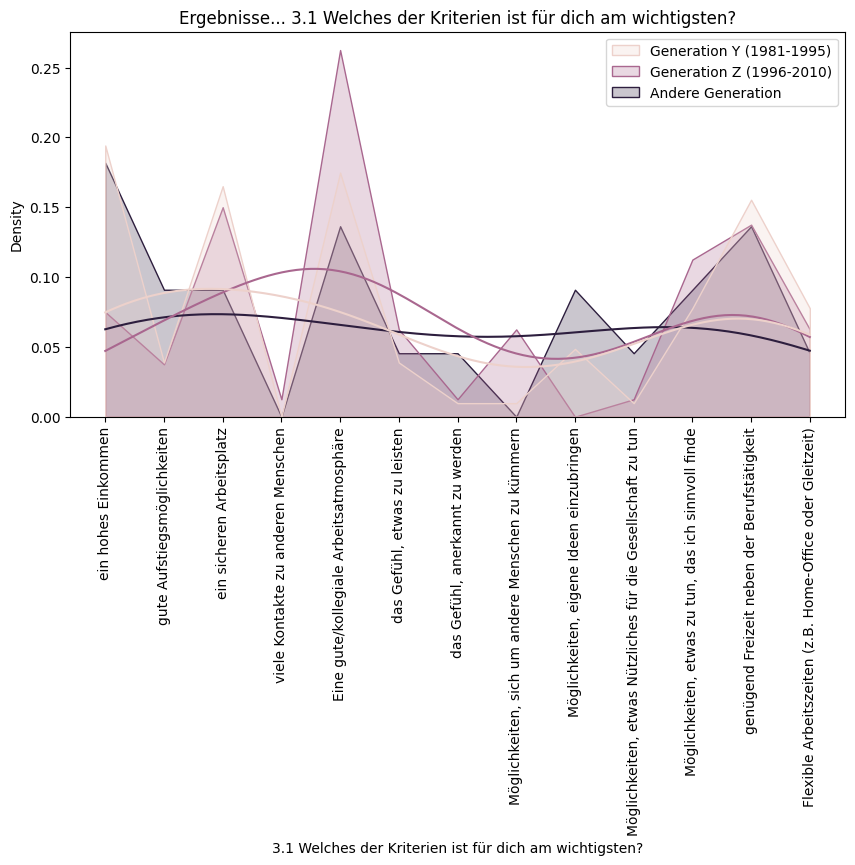

In [131]:
plot_hist('60371613', "one_to_n")

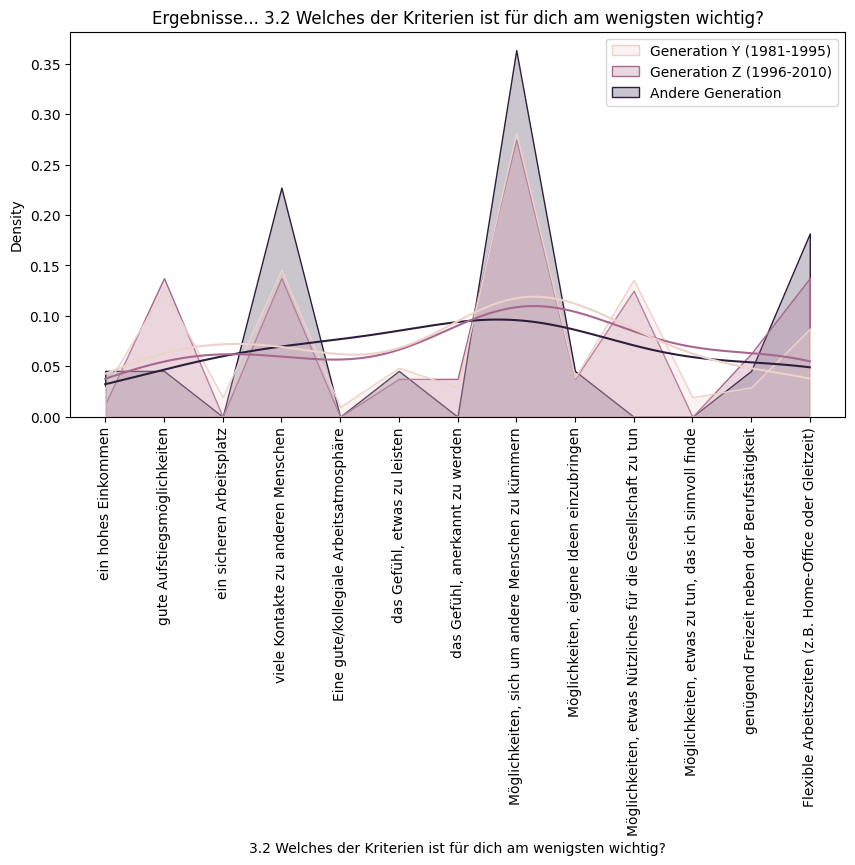

In [132]:
plot_hist('60371614', "one_to_n")

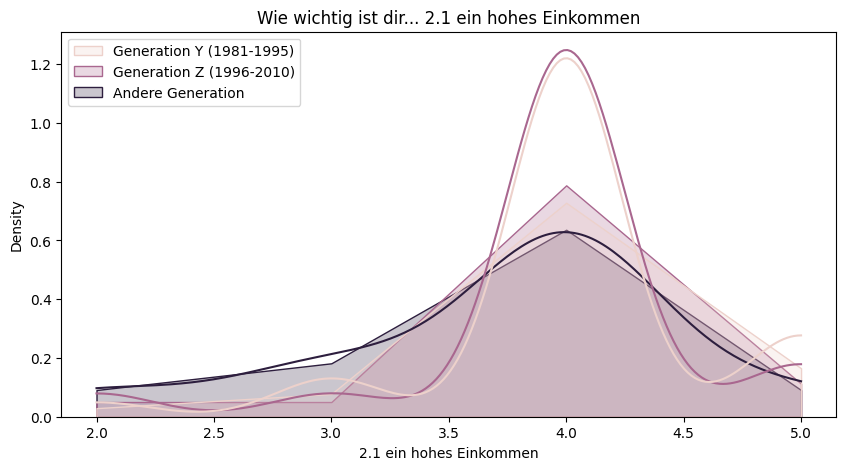

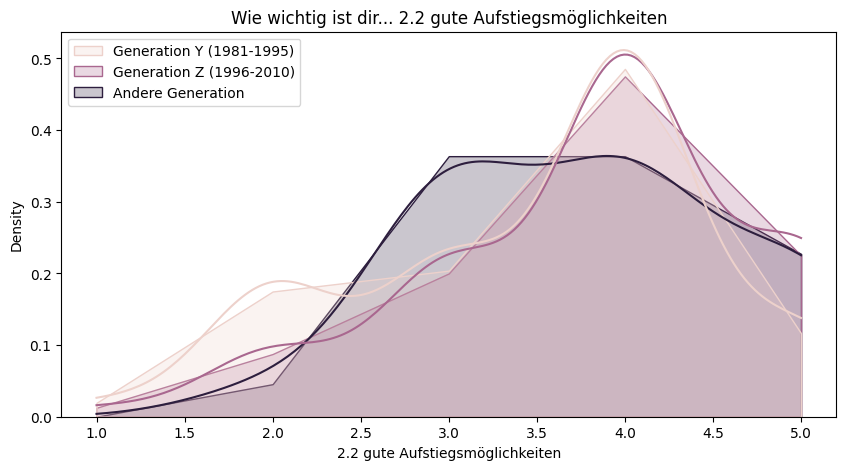

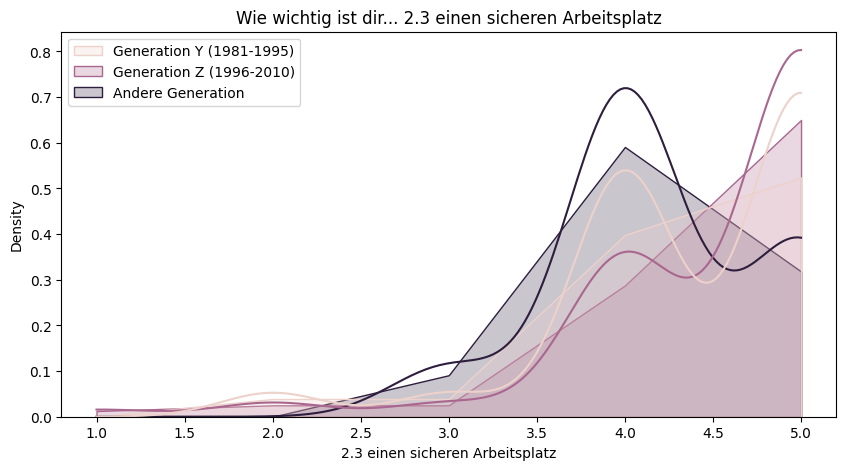

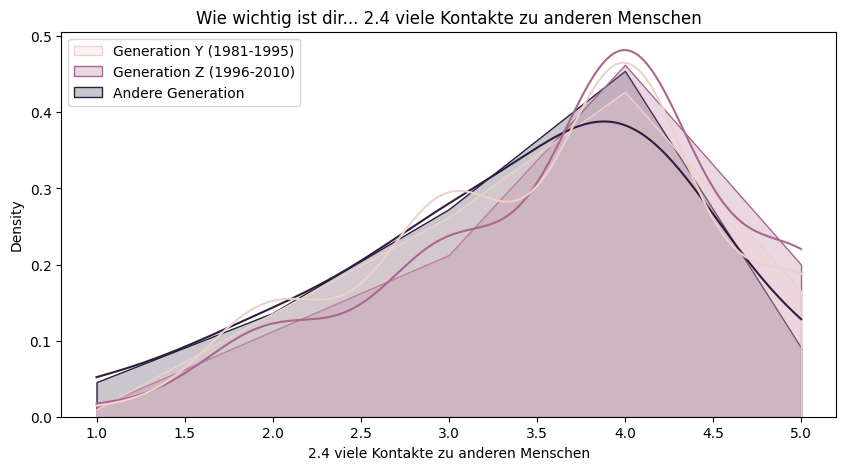

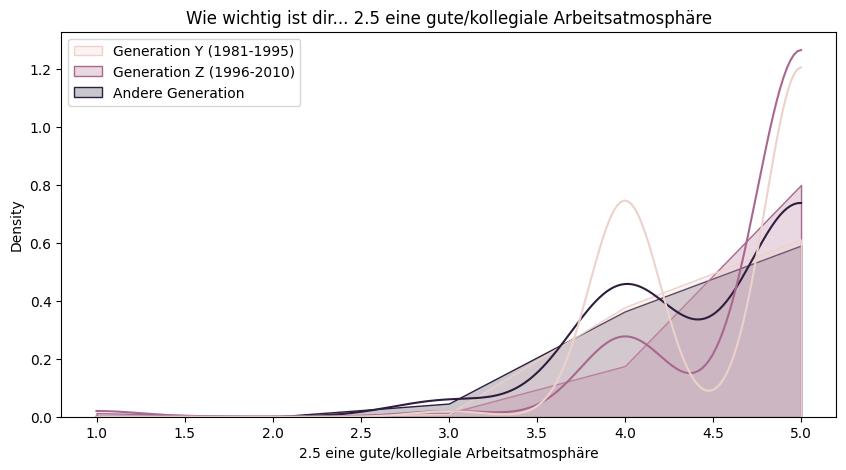

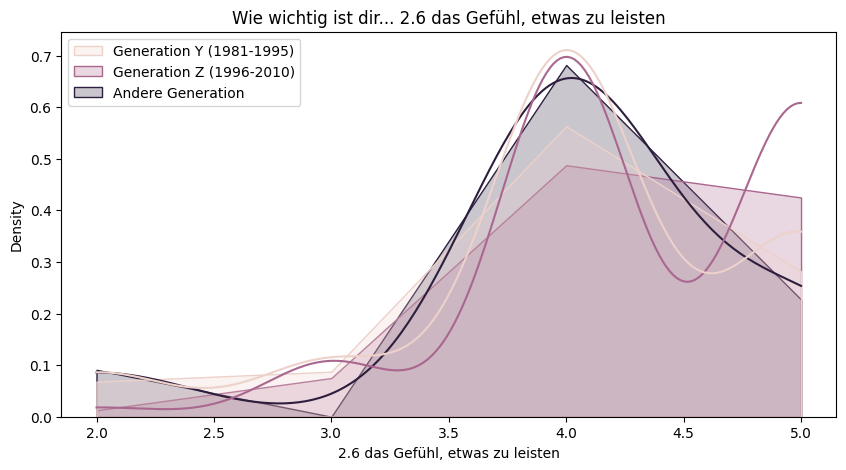

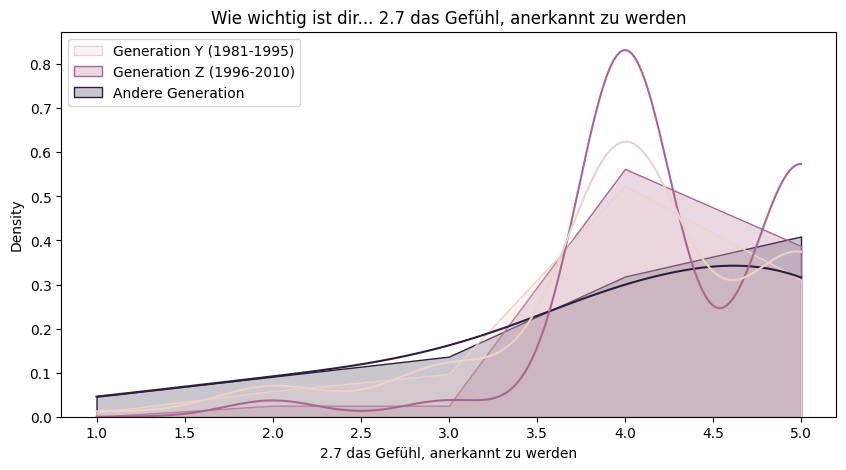

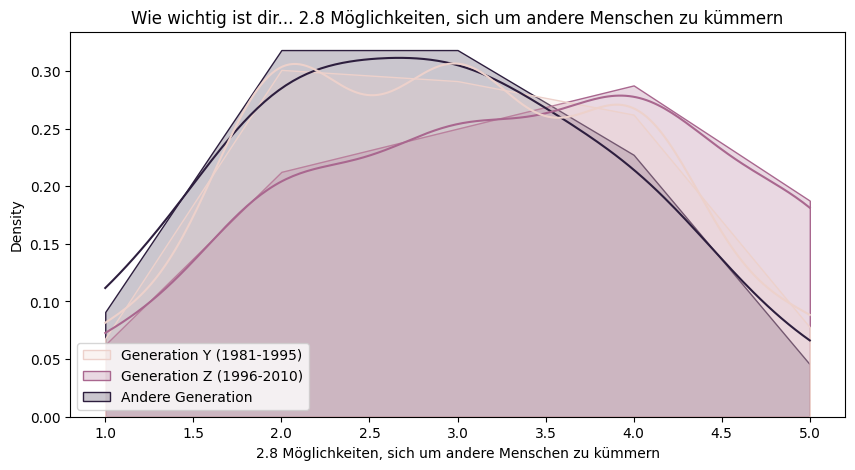

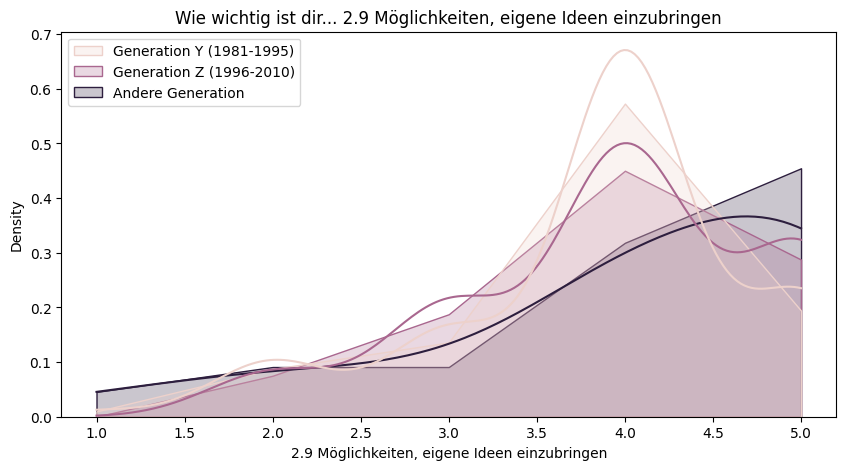

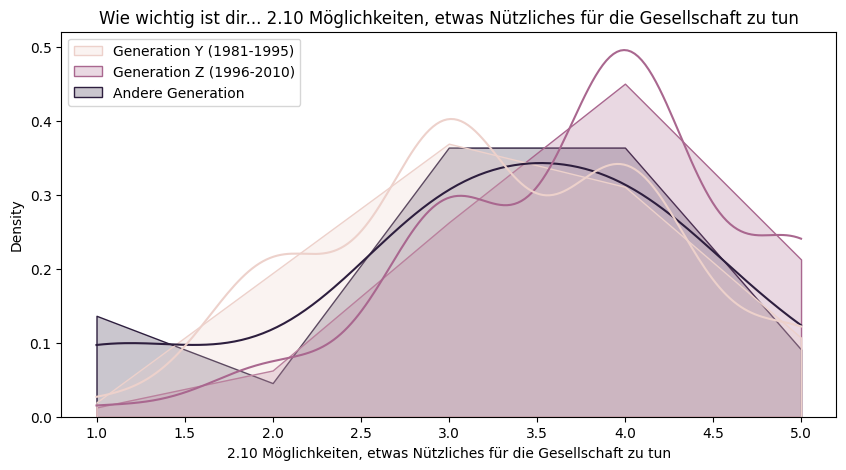

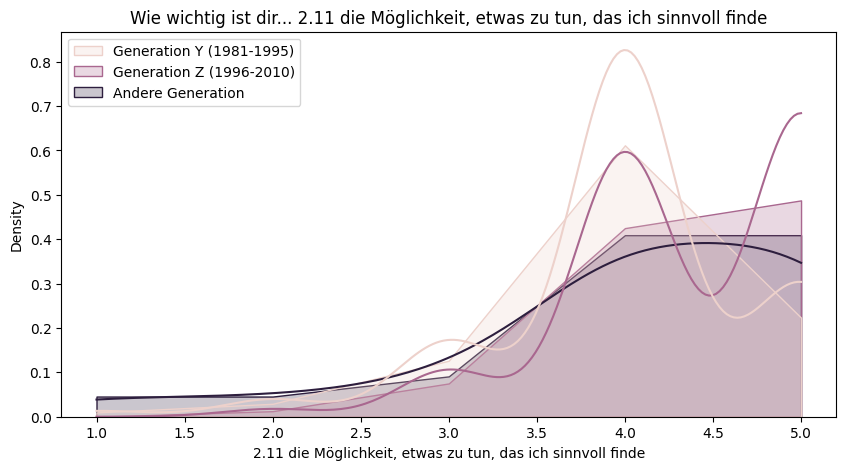

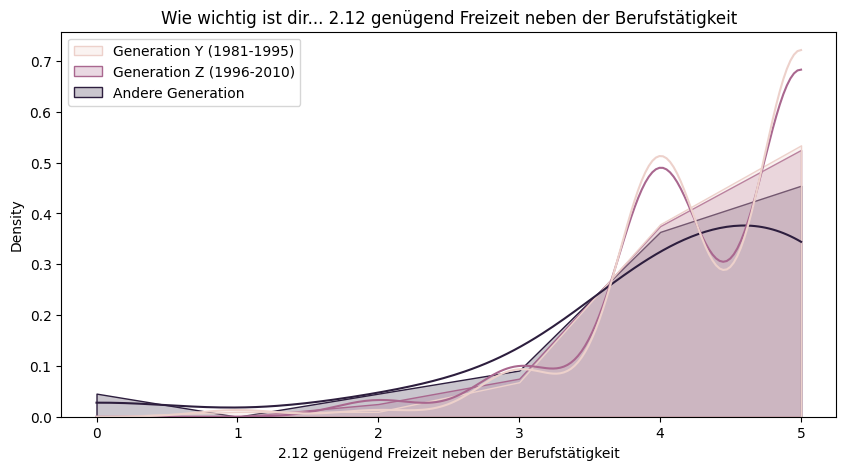

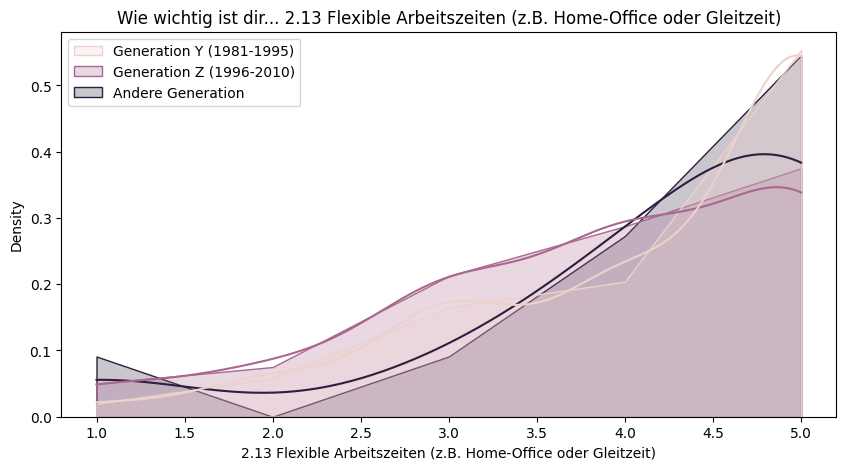

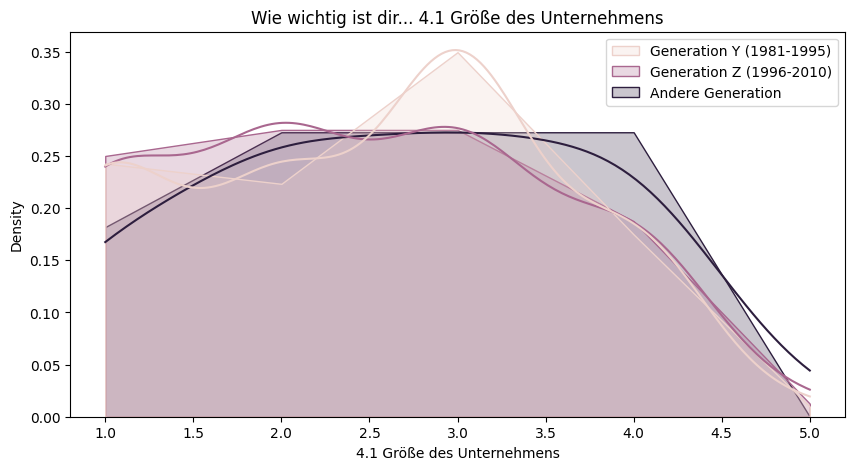

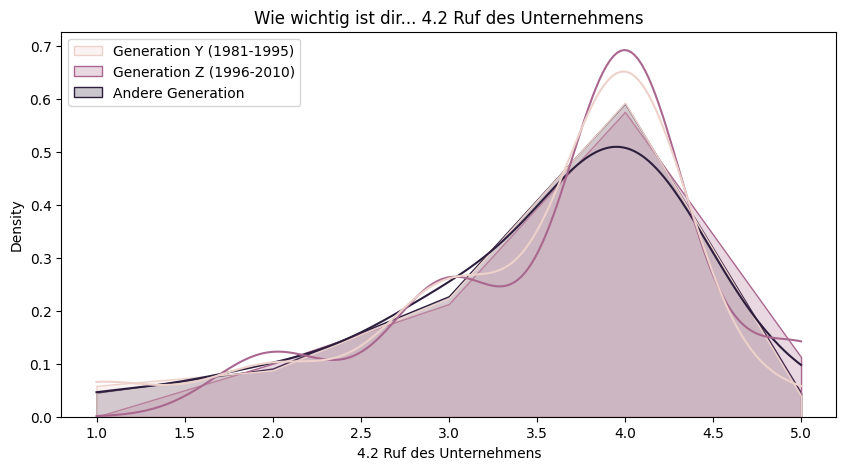

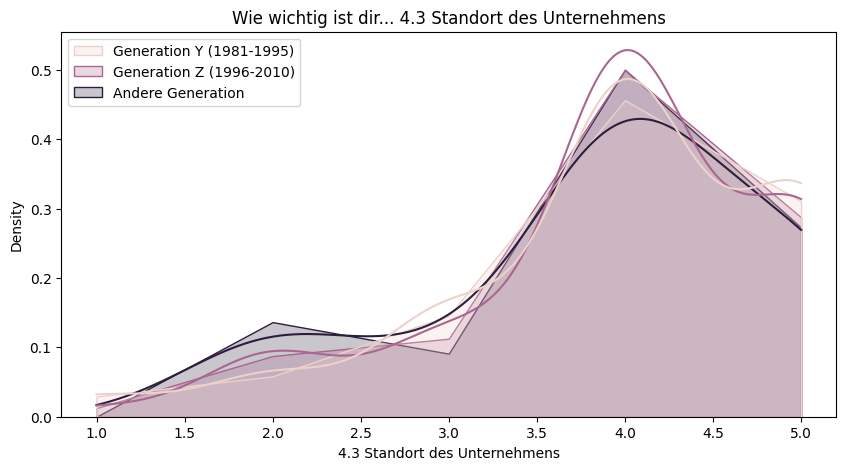

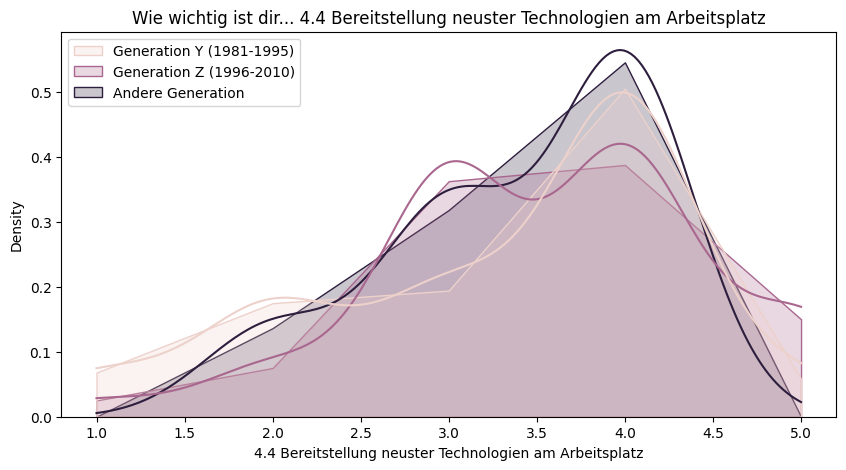

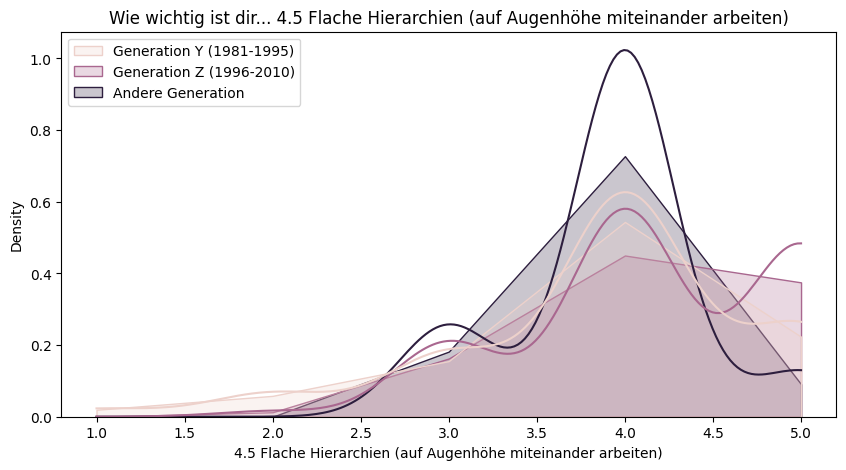

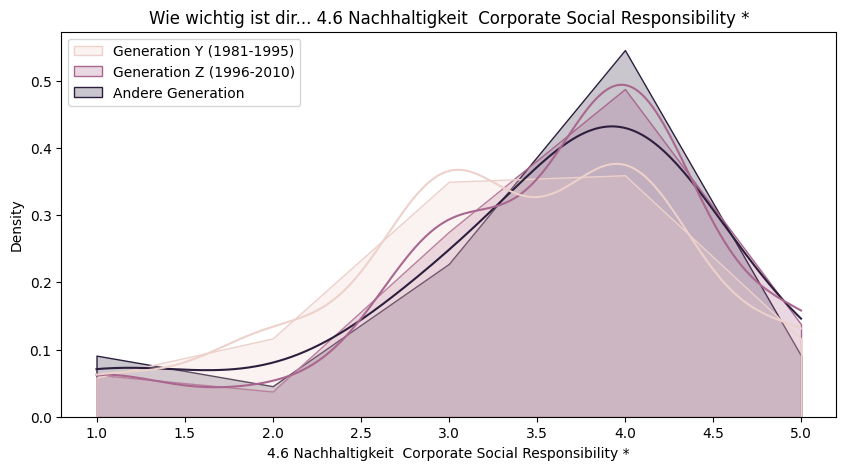

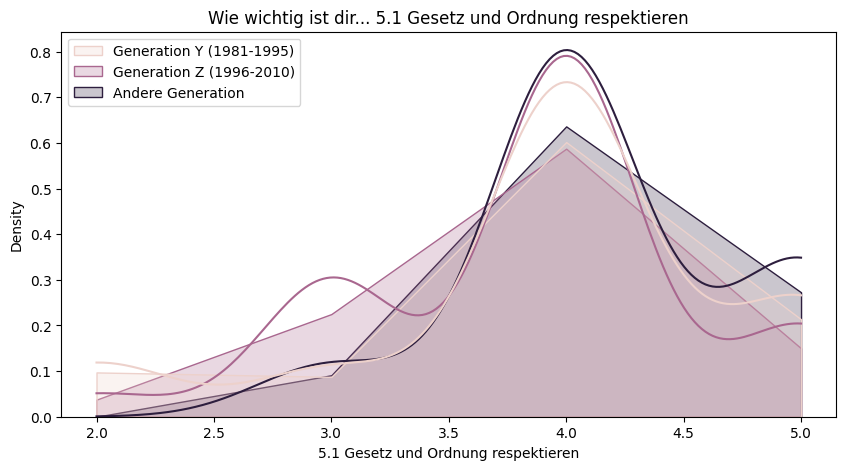

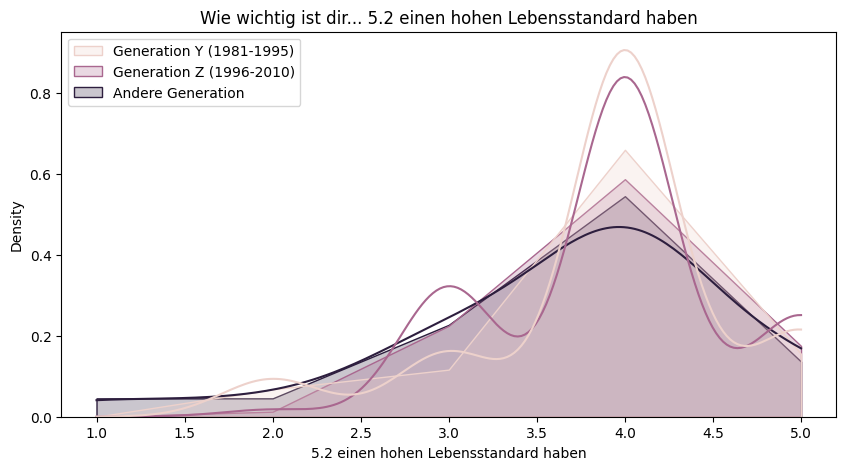

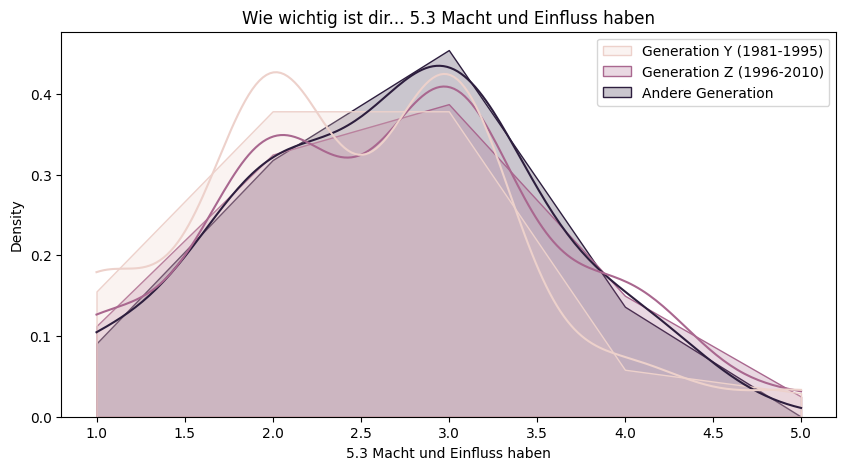

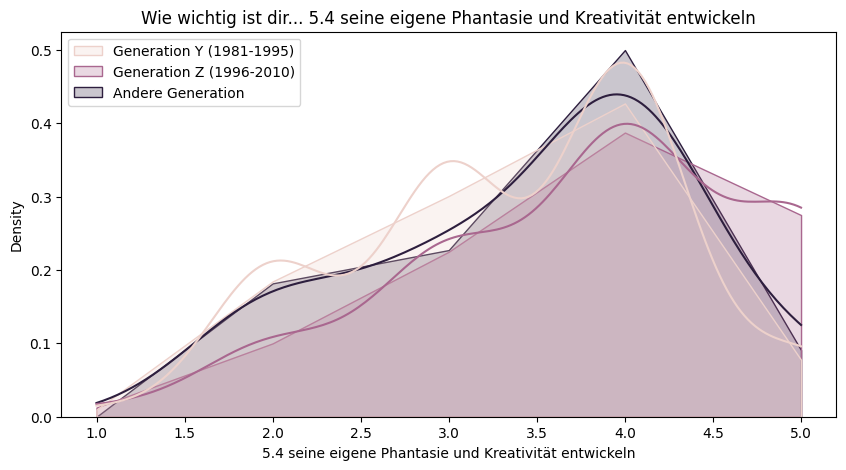

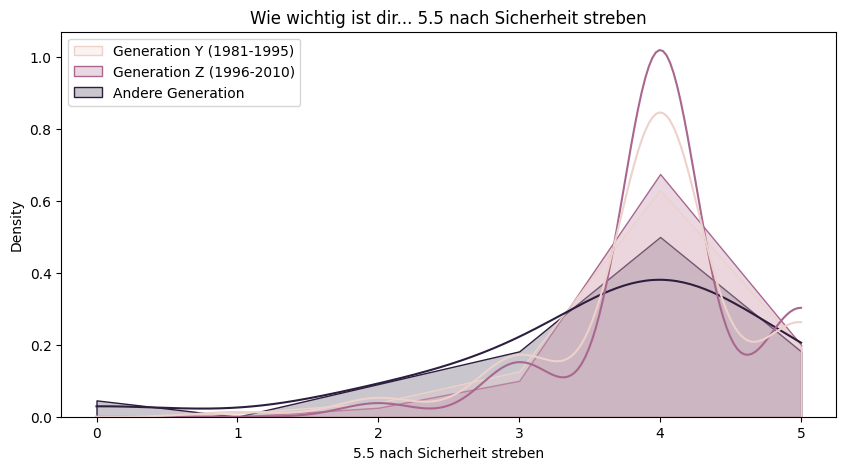

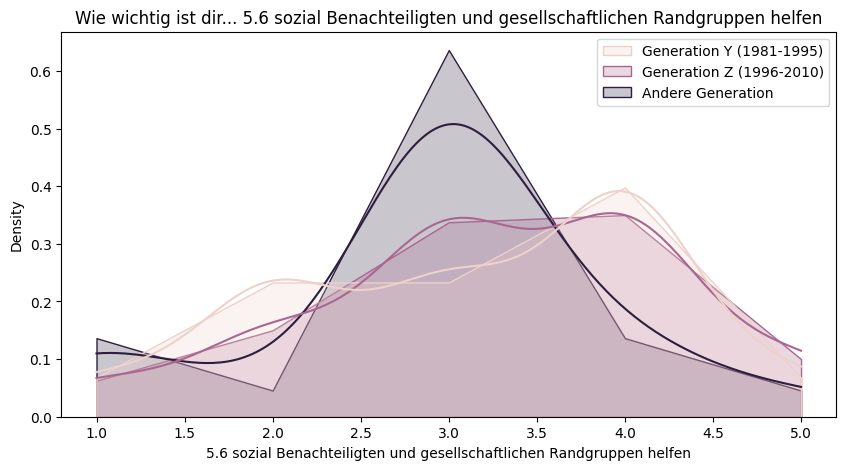

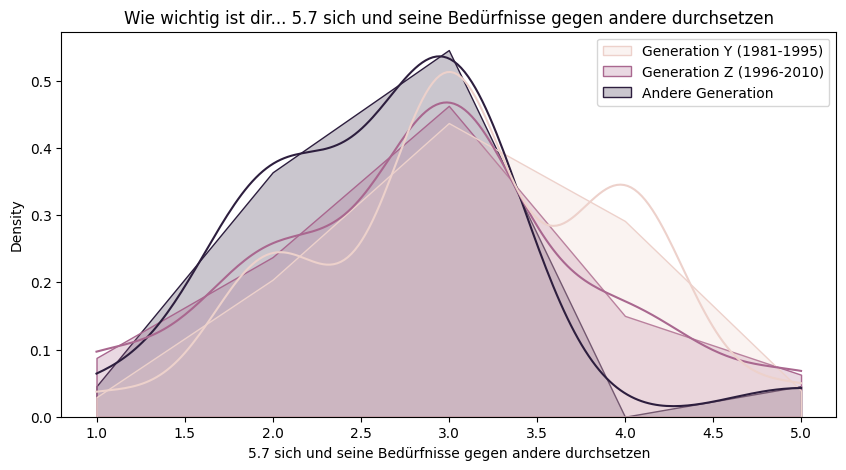

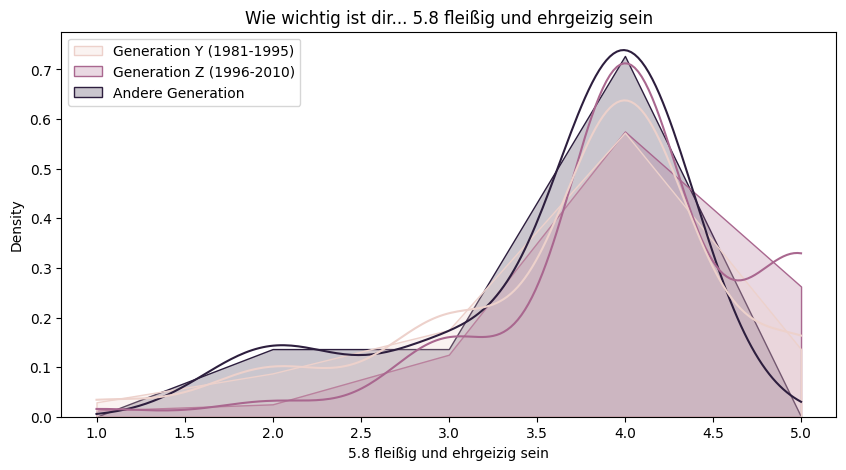

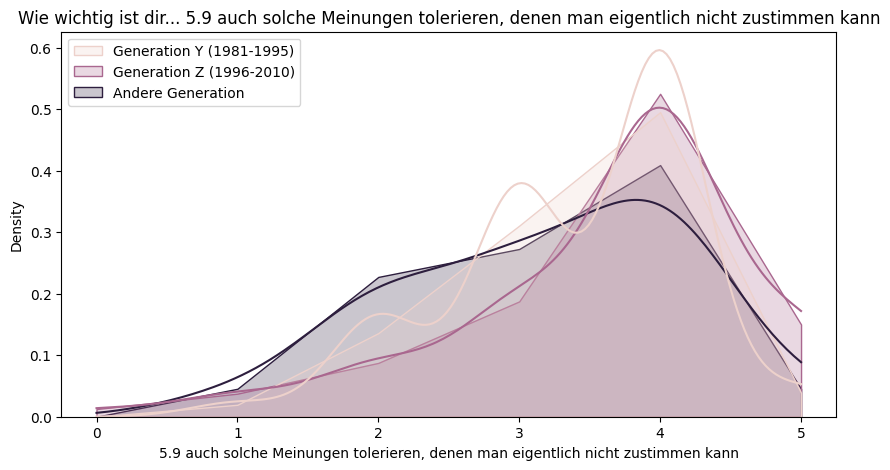

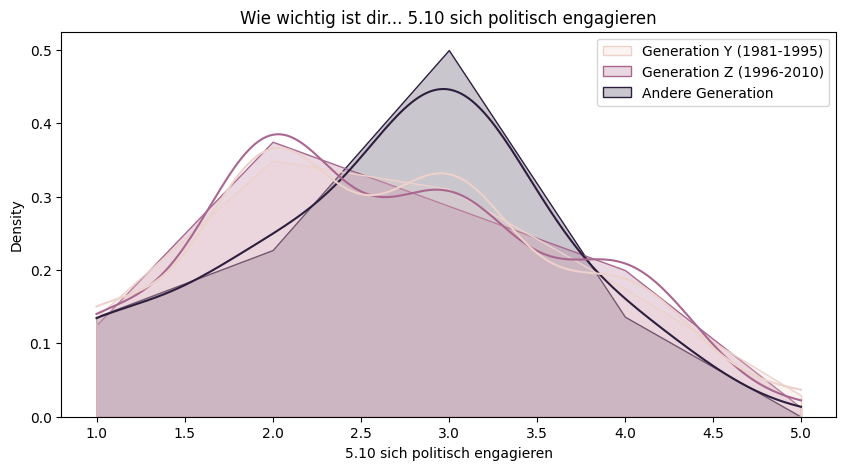

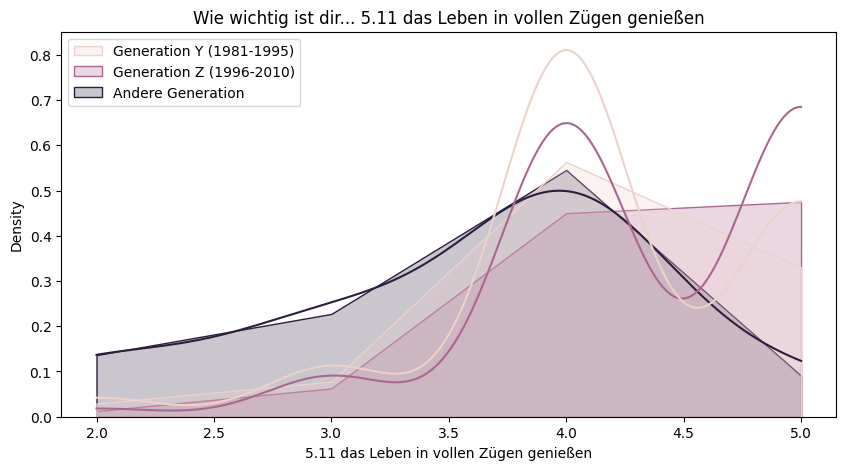

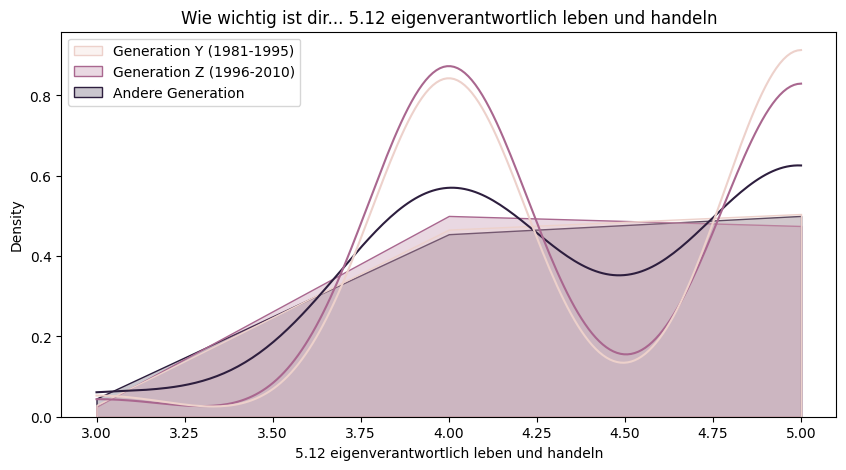

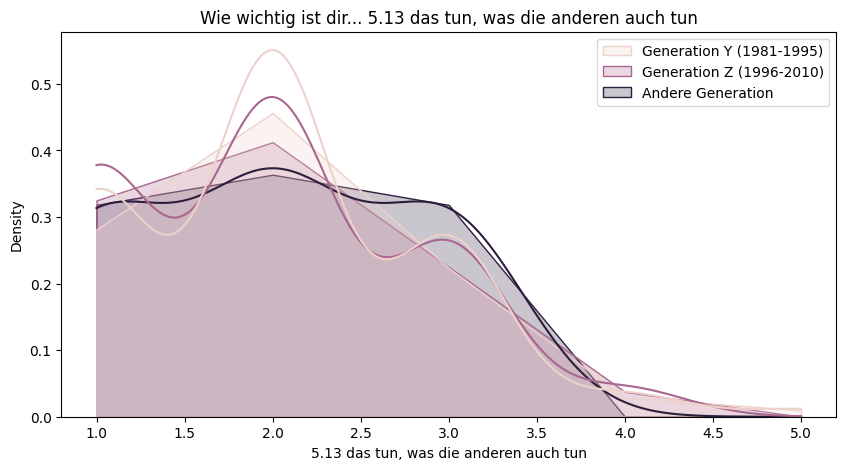

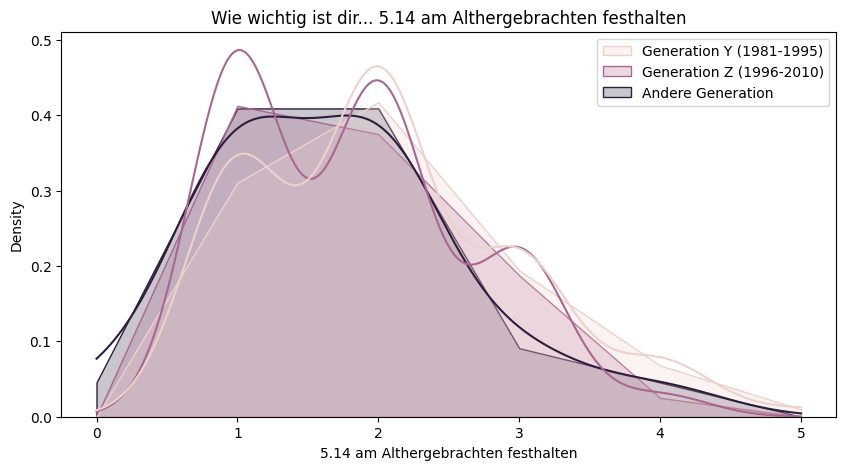

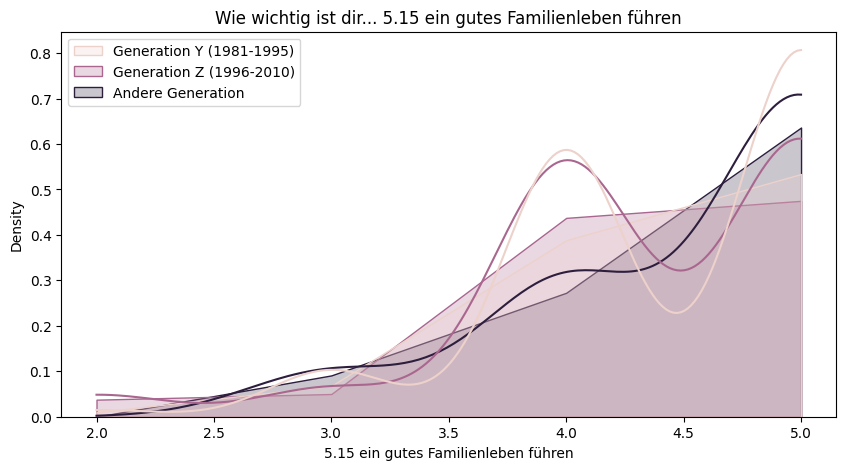

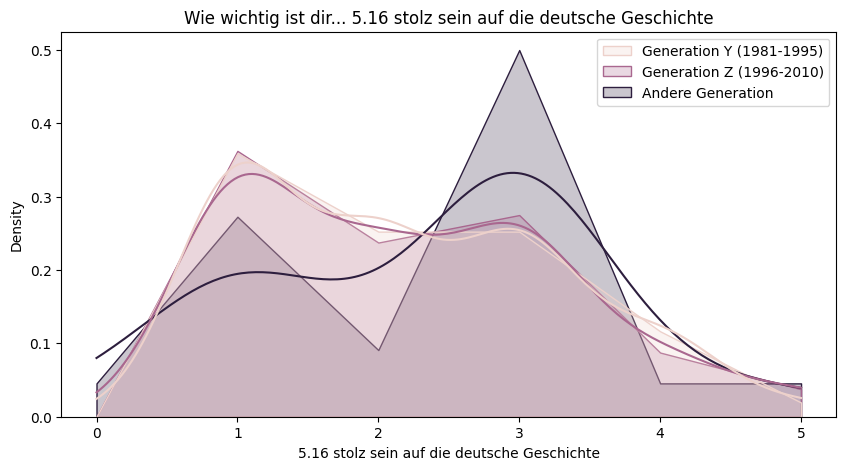

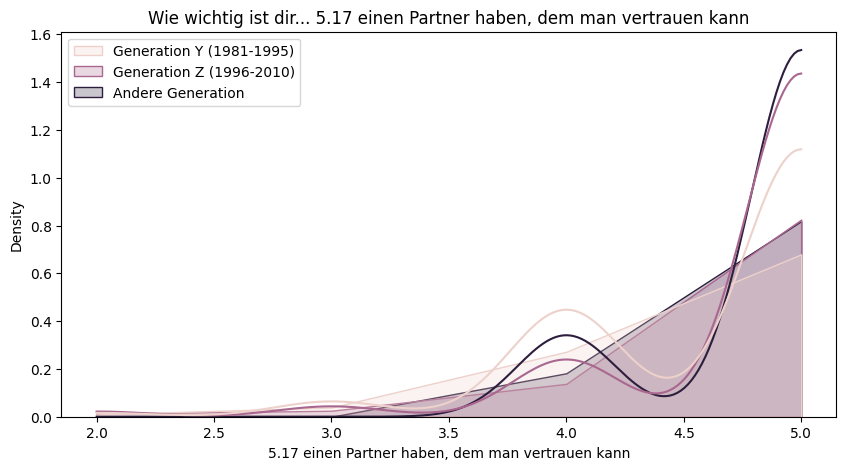

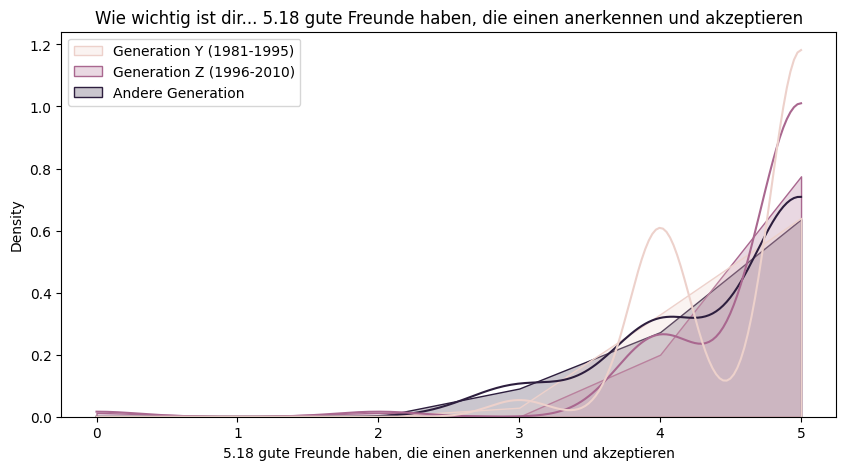

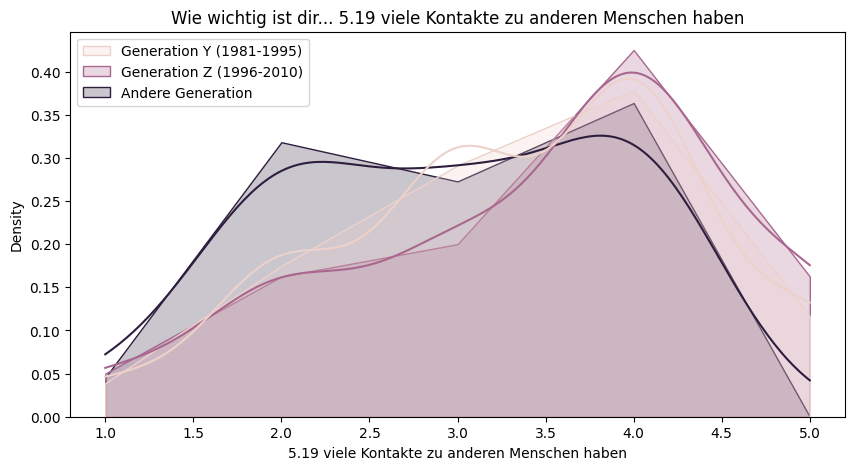

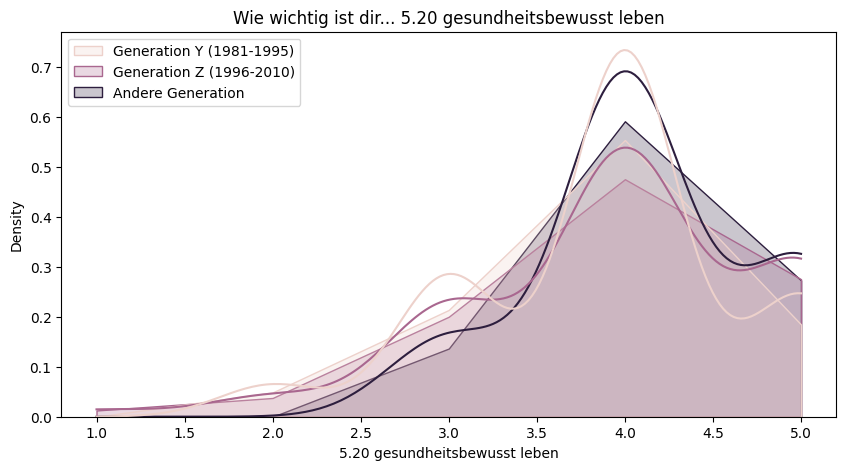

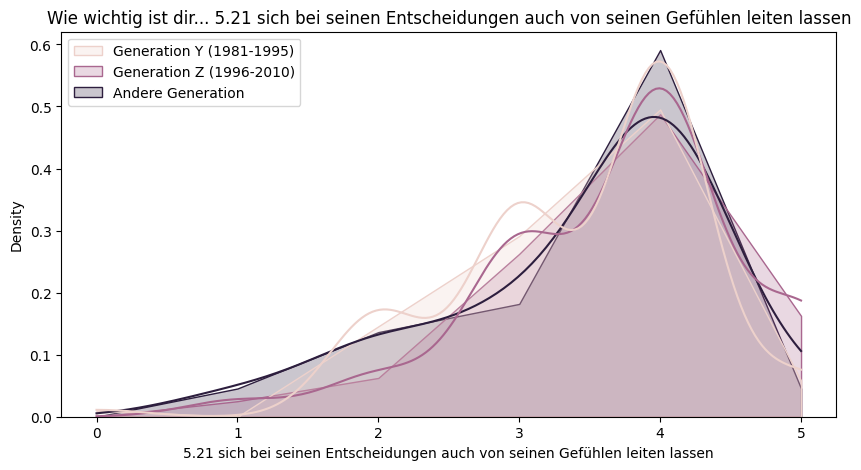

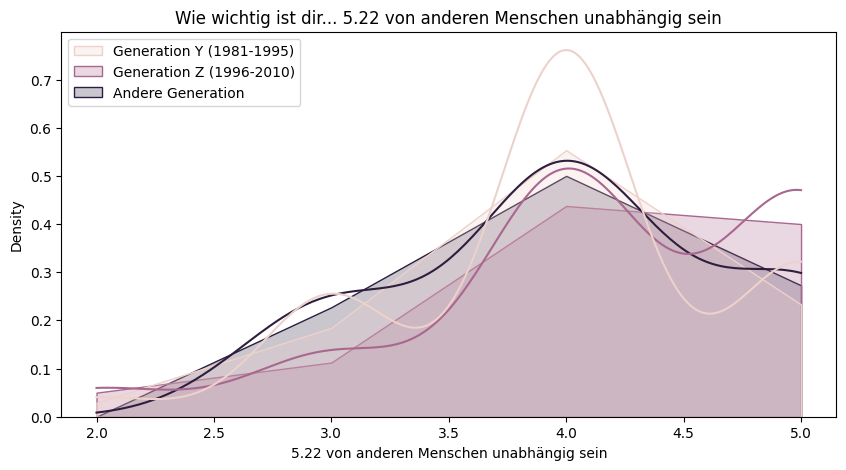

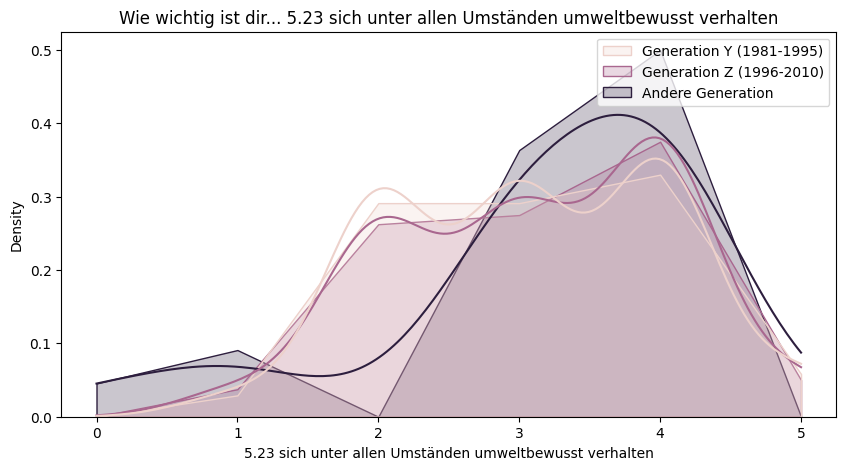

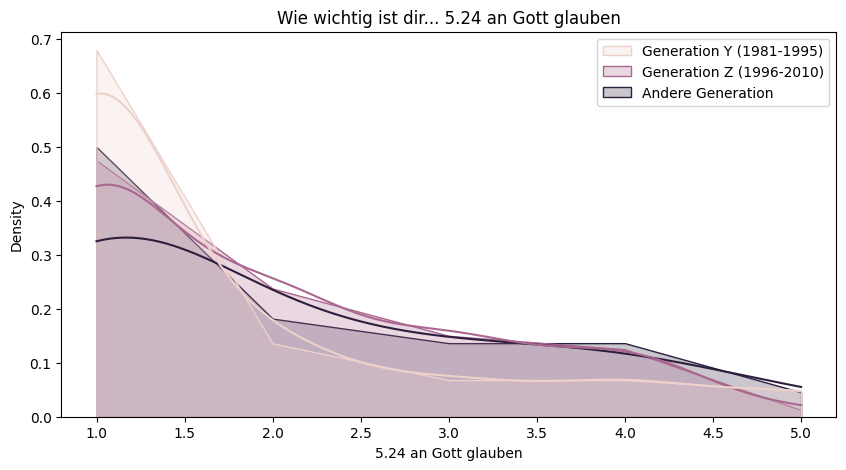

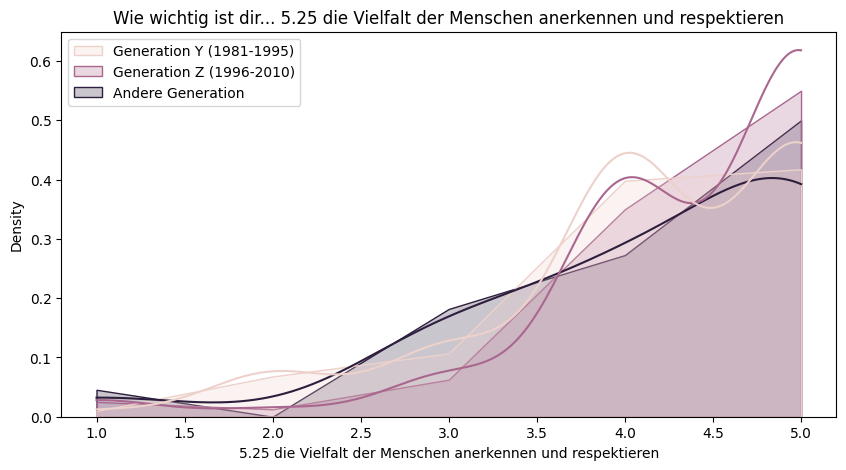

In [133]:
for col in skala_fach_ids:
    plot_hist(col, "skala")

In [144]:
def plot_violin(col_code: str, col_type: str):
    plt.figure(figsize=(10,5))
    fig = sns.violinplot(data=df_results, x=col_code, y=generation_col, orient='h')
    plt.ylabel("Generationen")
    plt.xlabel(get_question_text(col_code))
    #if col_type == "skala":
    #    plt.title(f"Wie wichtig ist dir... {get_question_text(col_code)}")
    #else:
    #    plt.title(f"Ergebnisse... {get_question_text(col_code)}")
    if col_type == 'one_to_n':
        fig.set_xticks(sorted(df_results[col_code].unique())) # <--- set the ticks first
        fig.set_xticklabels([get_answer_text(col_code, x) for x in sorted(df_results[col_code].unique())], rotation=90)
    plt.show(fig)

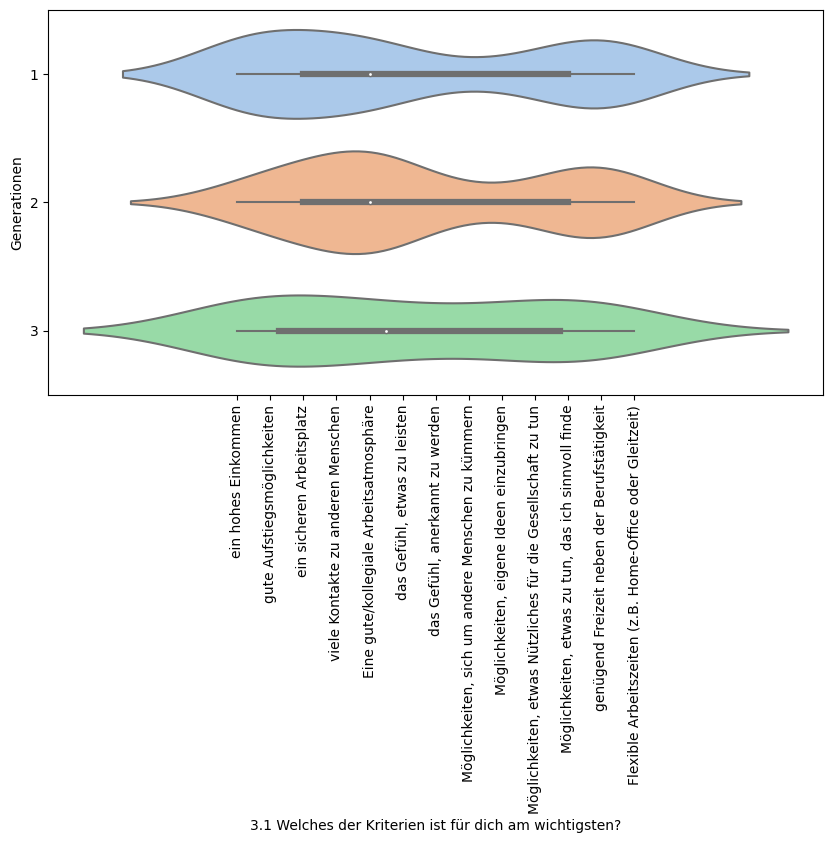

In [145]:
plot_violin('60371613', "one_to_n")

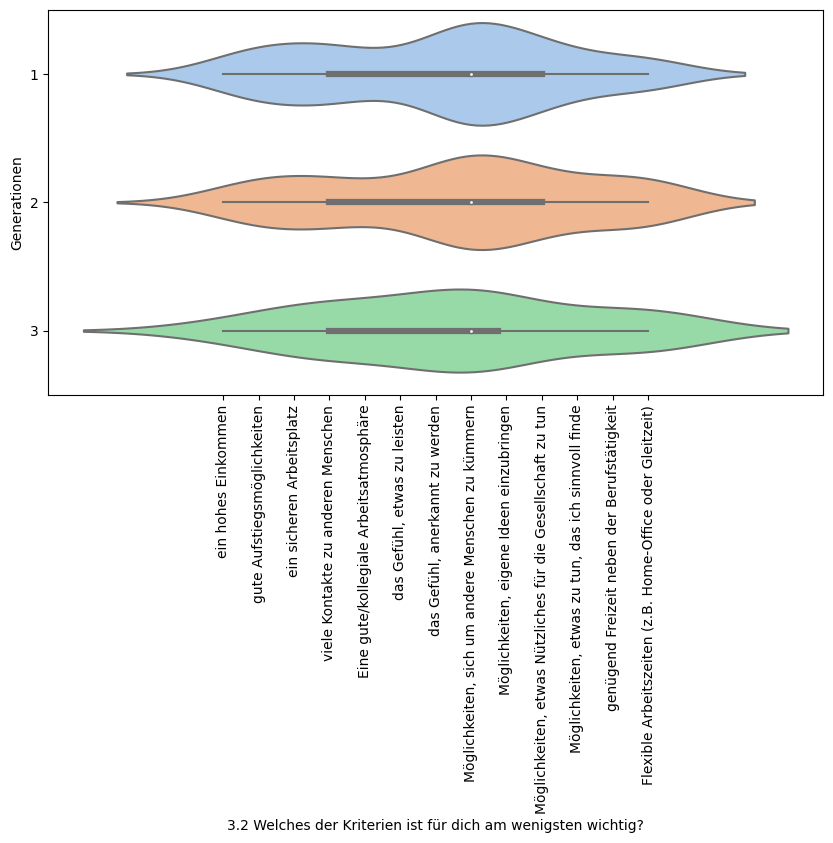

In [146]:
plot_violin('60371614', "one_to_n")

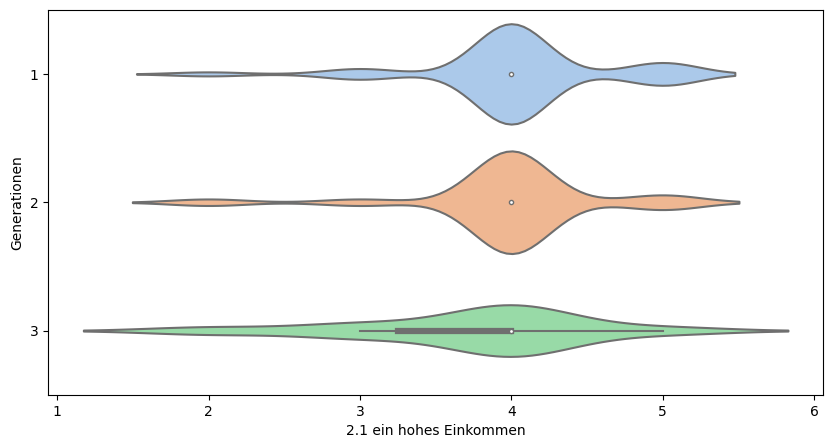

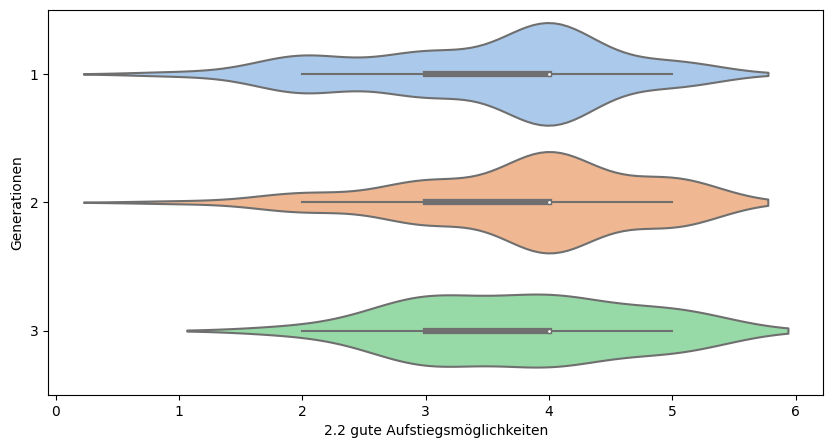

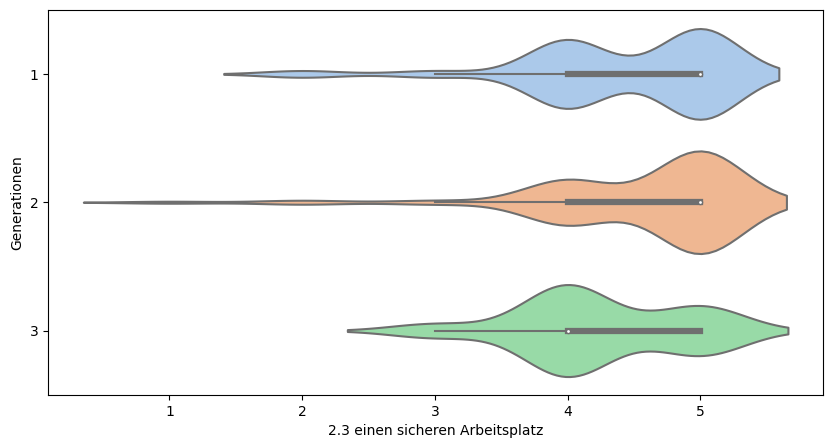

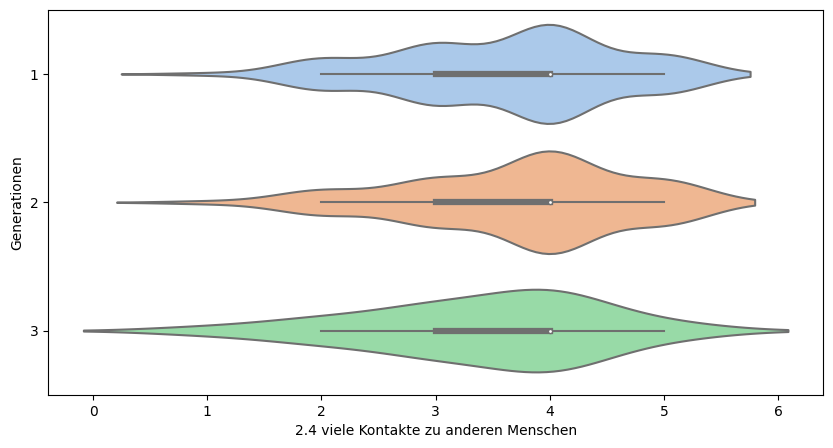

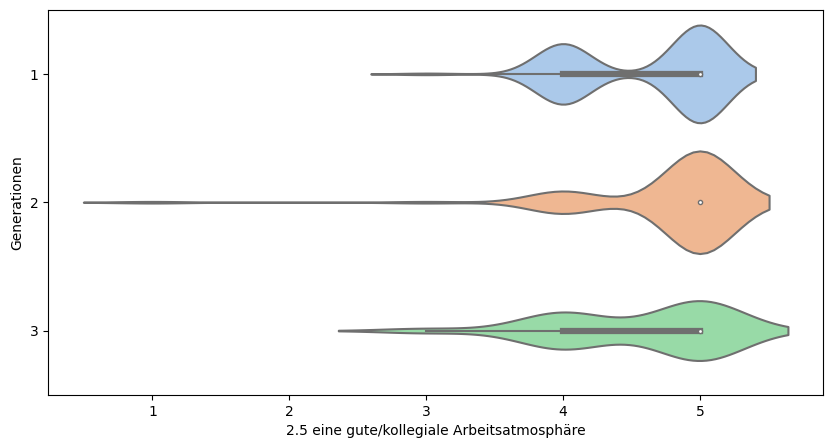

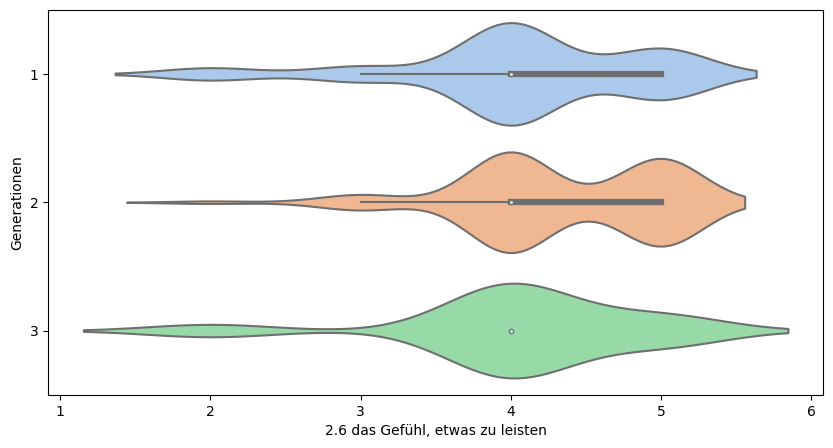

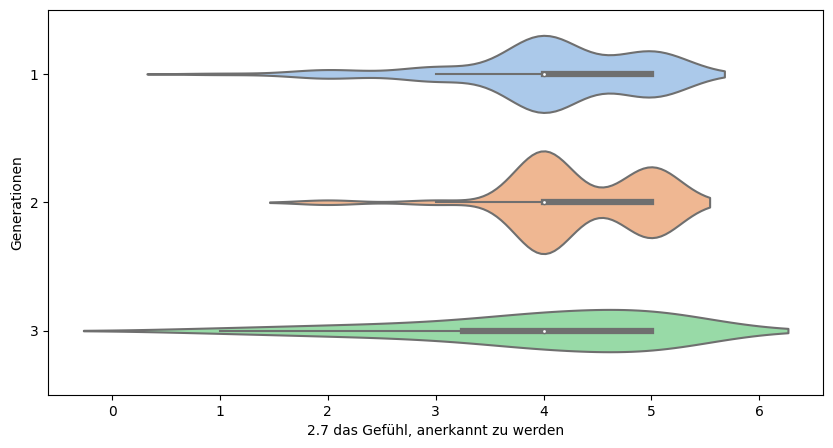

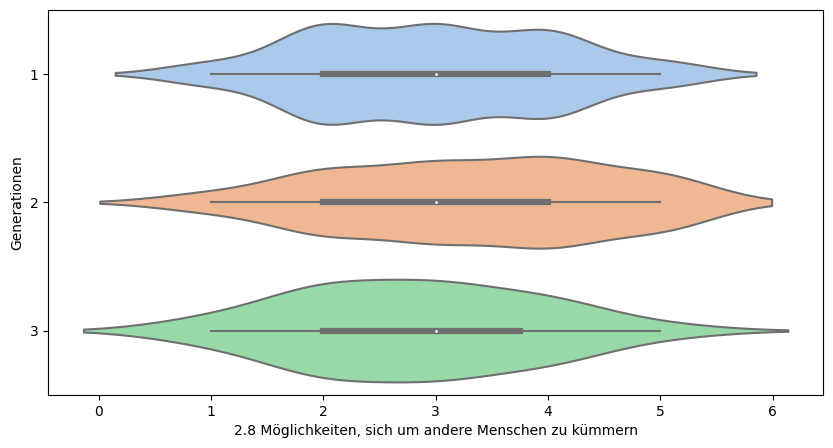

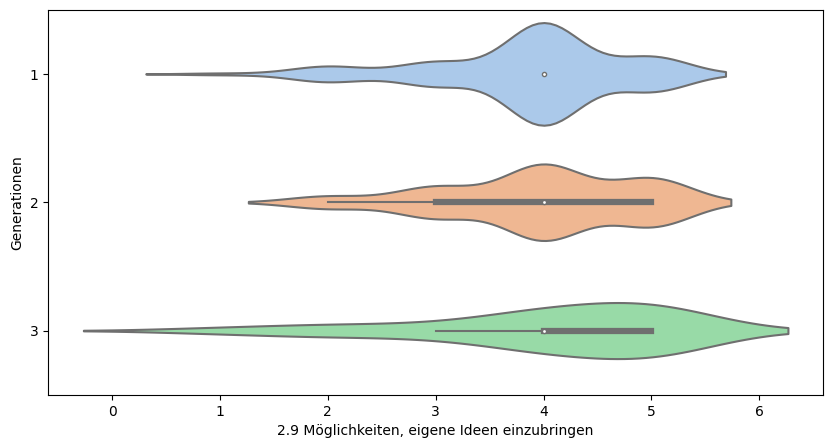

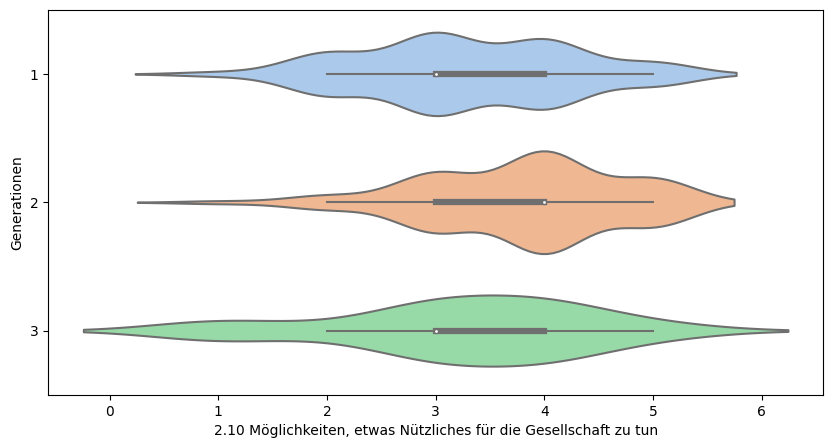

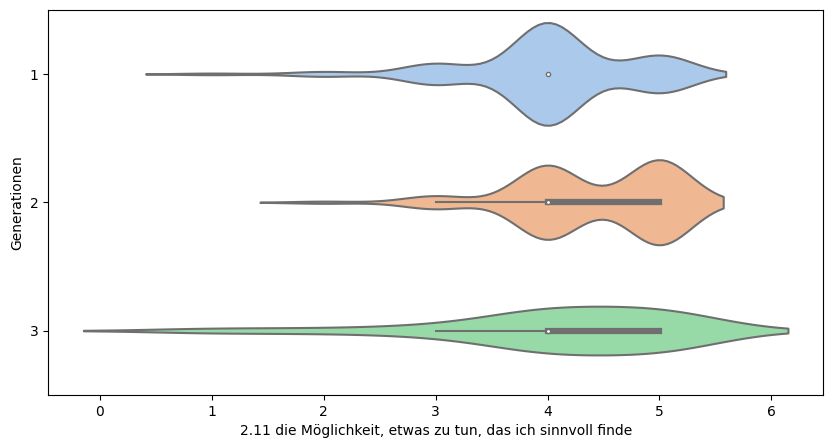

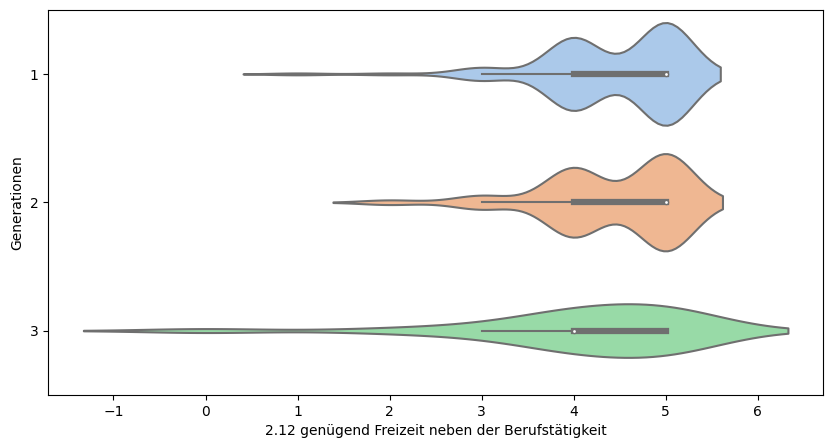

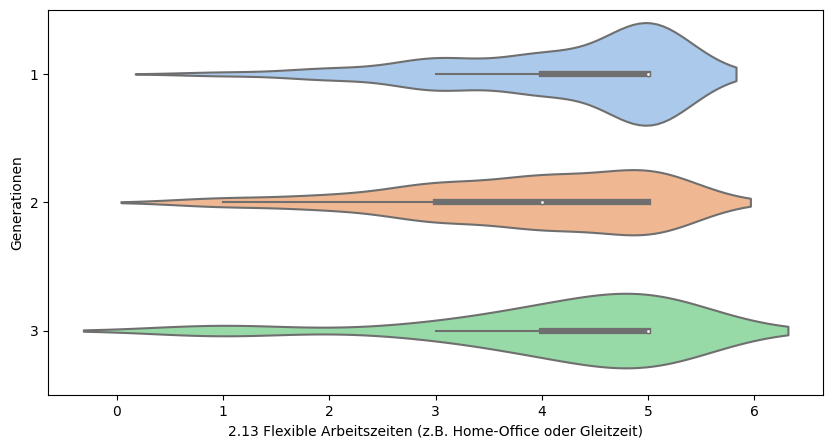

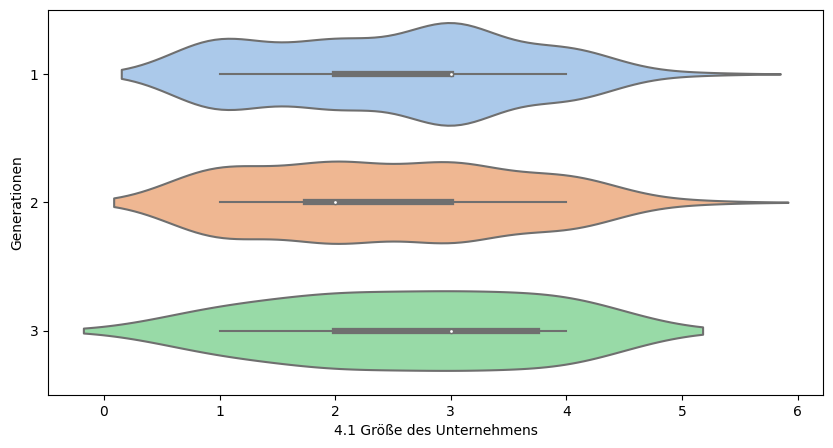

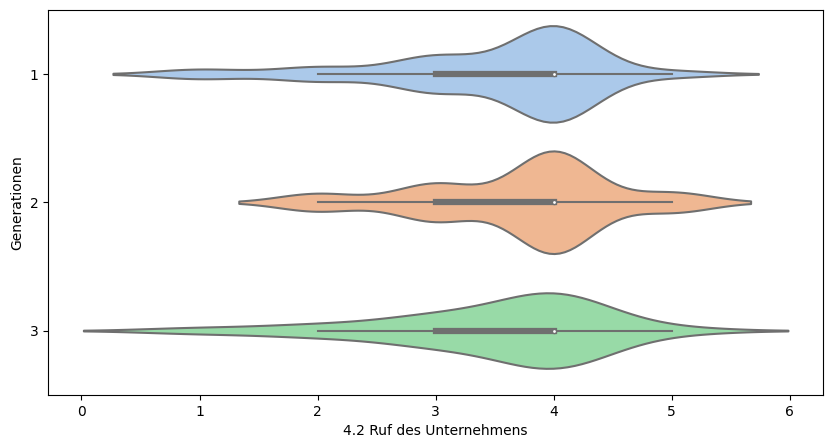

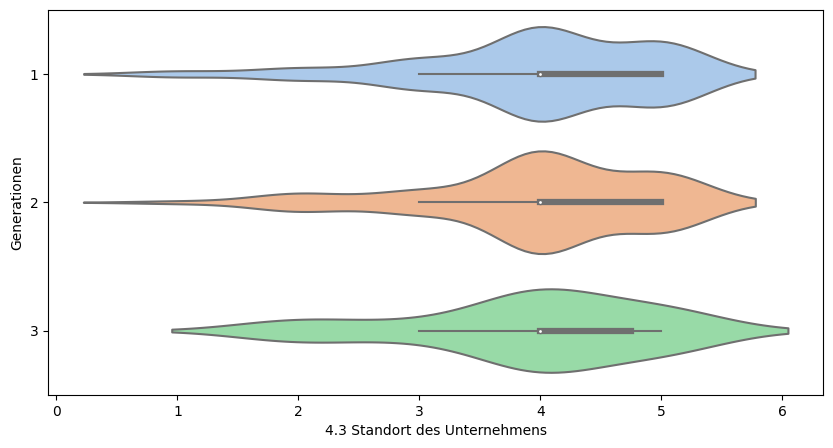

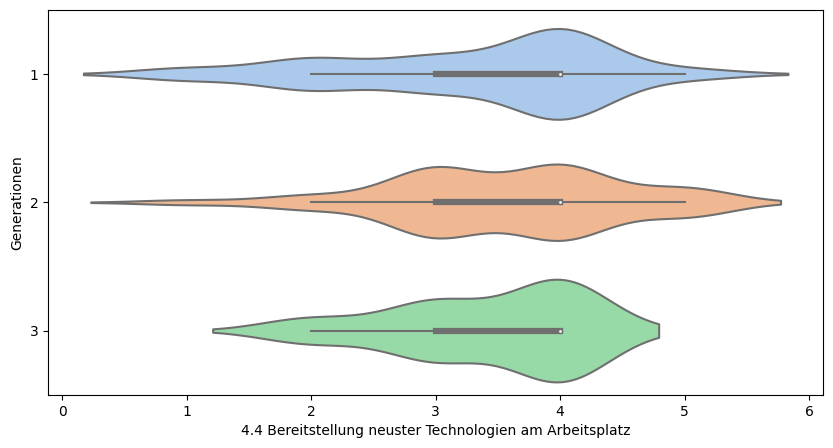

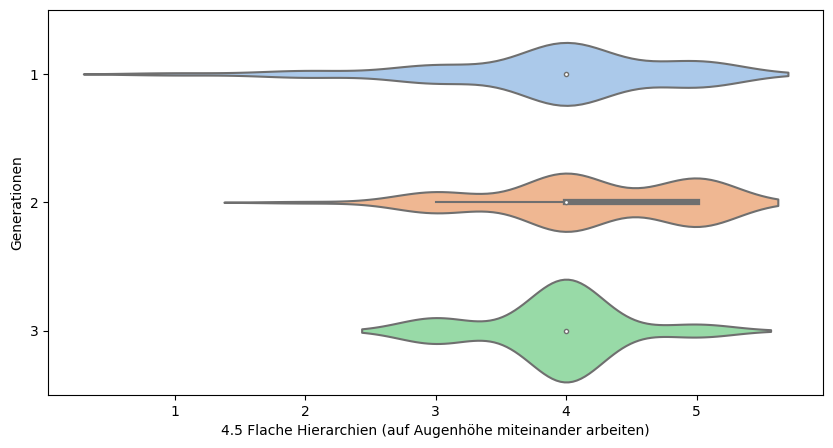

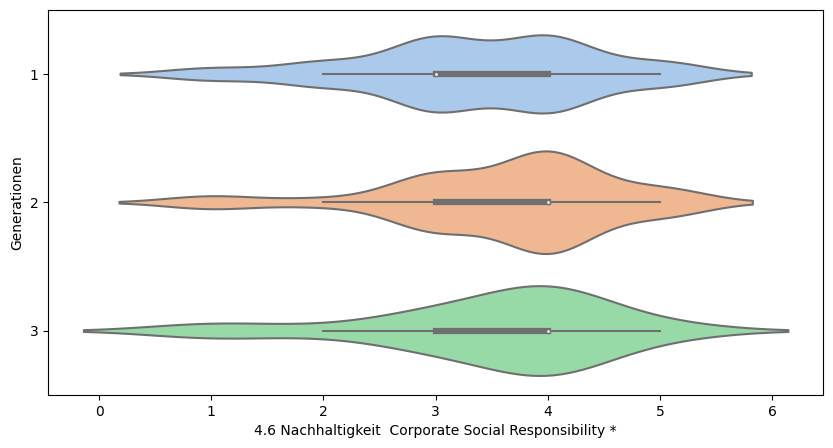

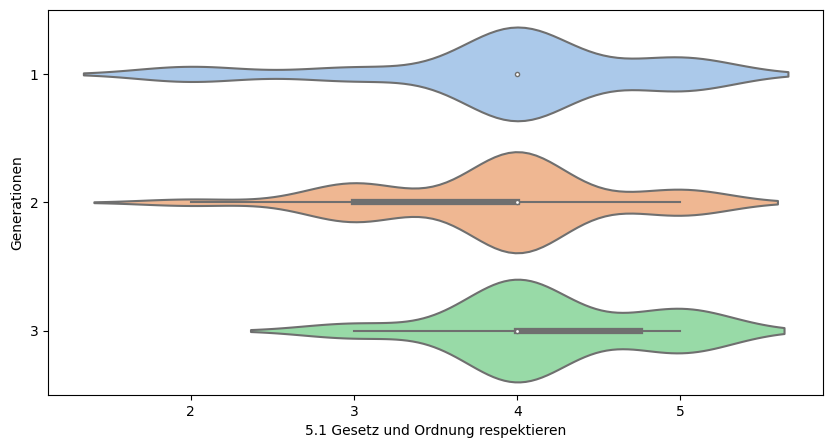

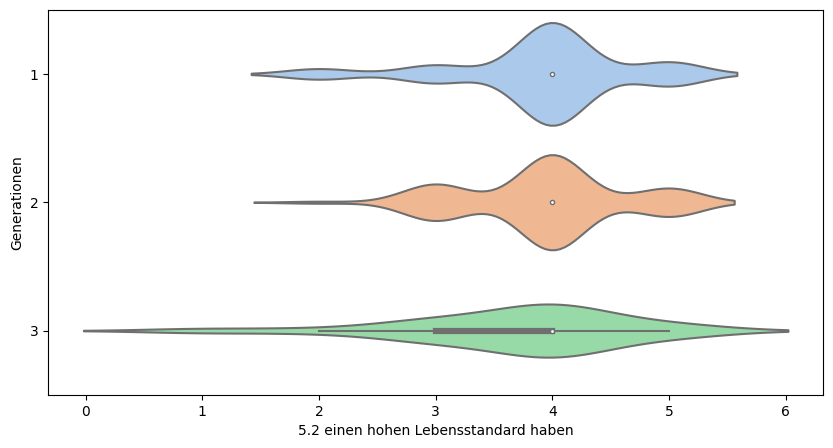

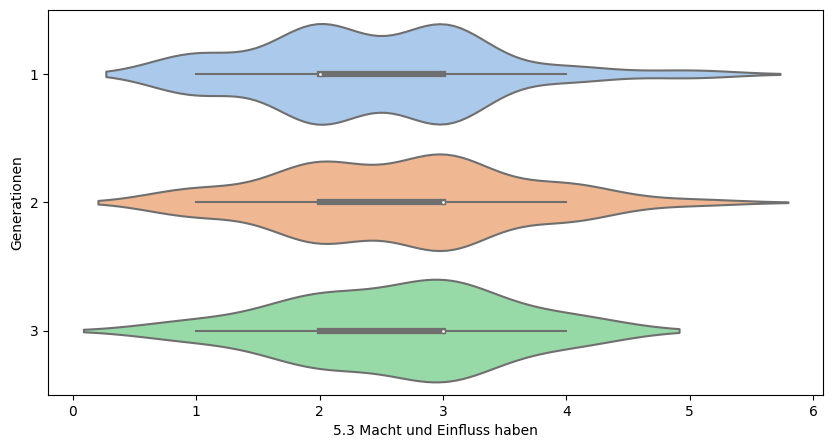

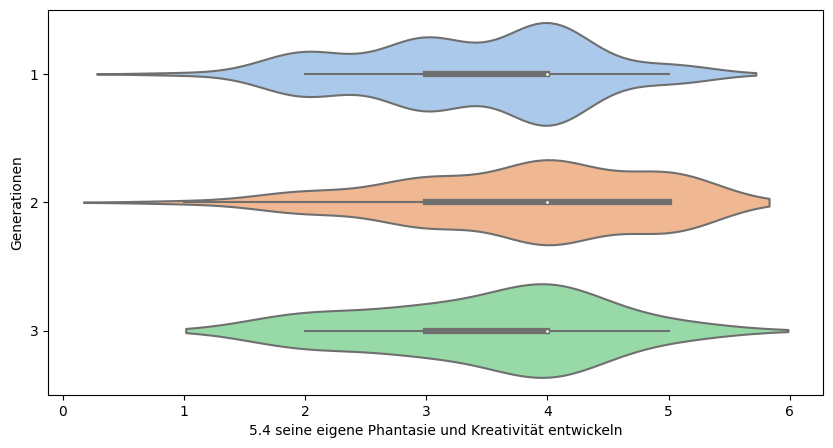

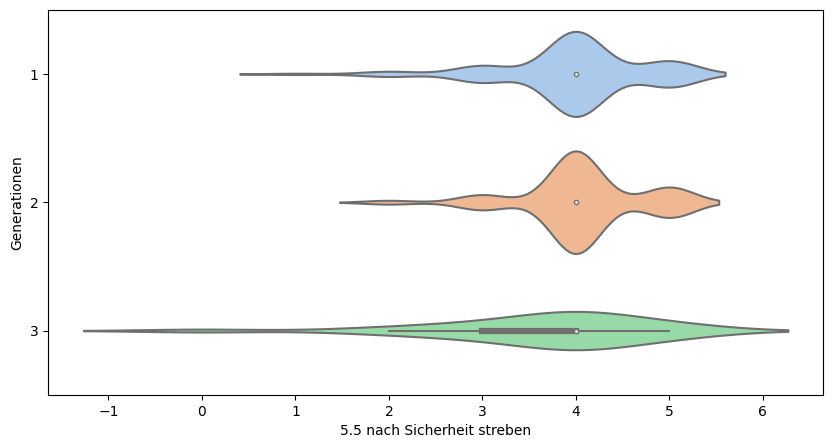

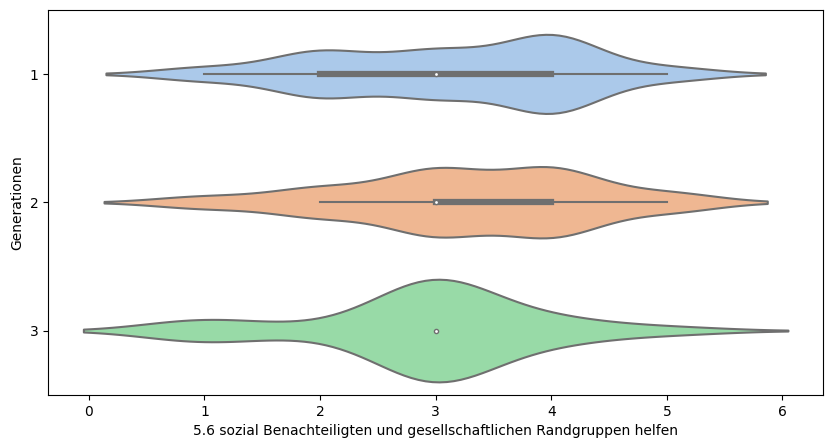

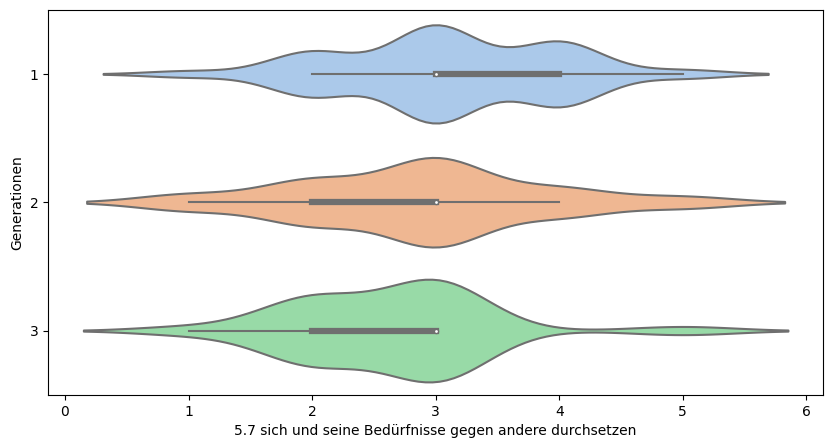

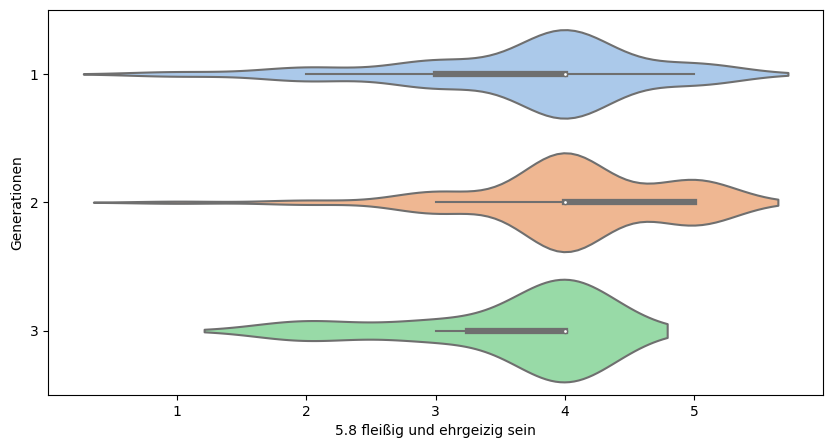

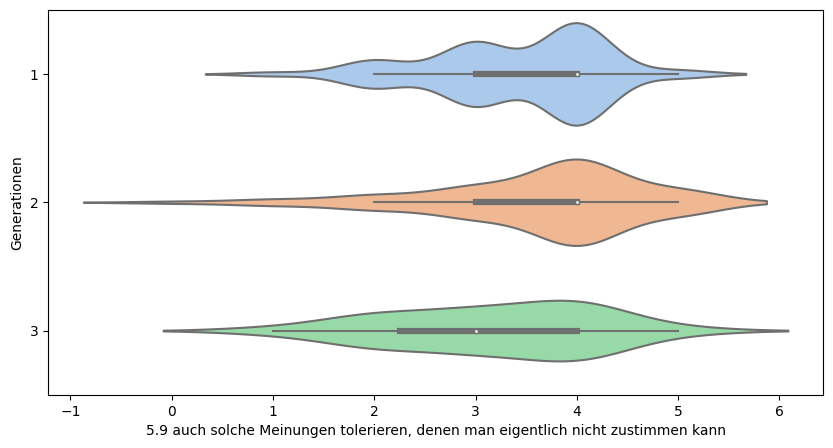

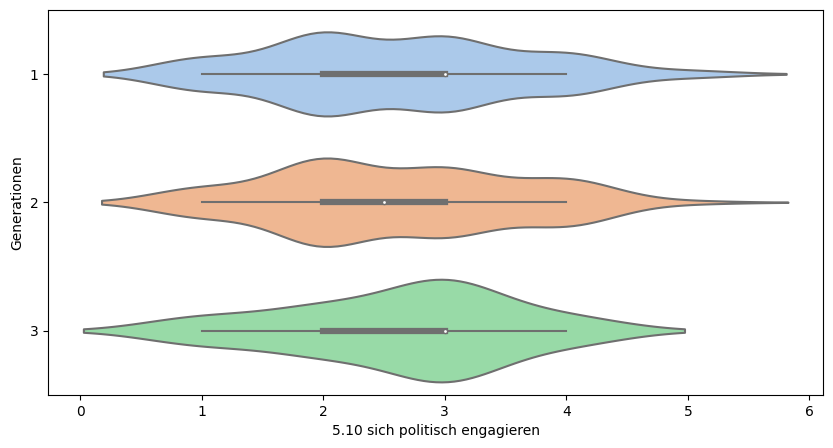

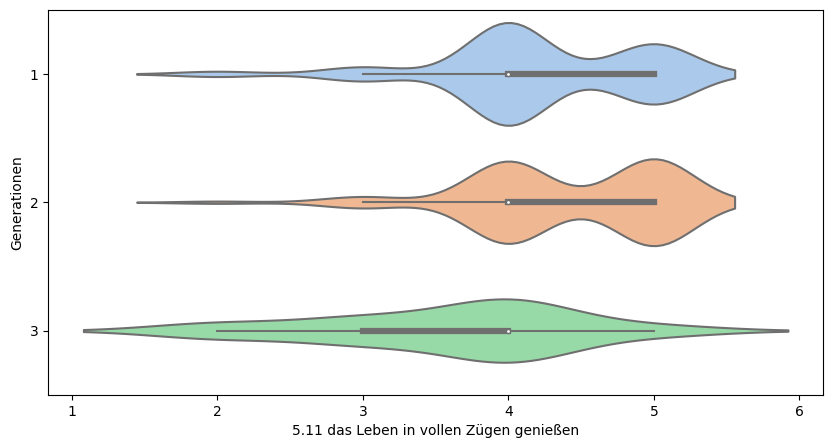

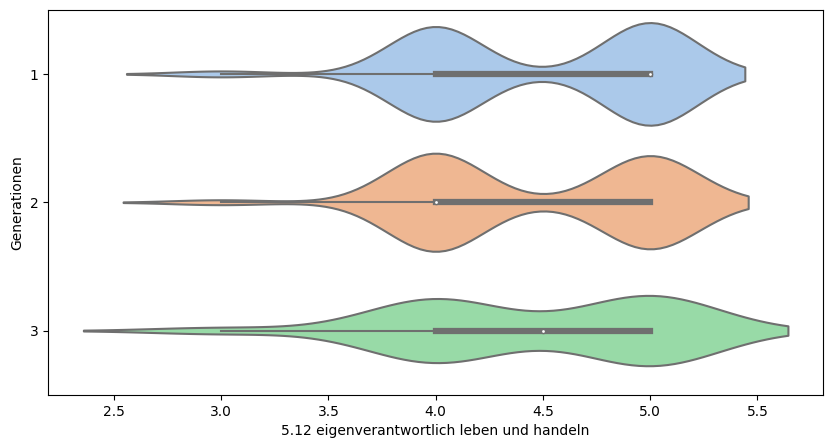

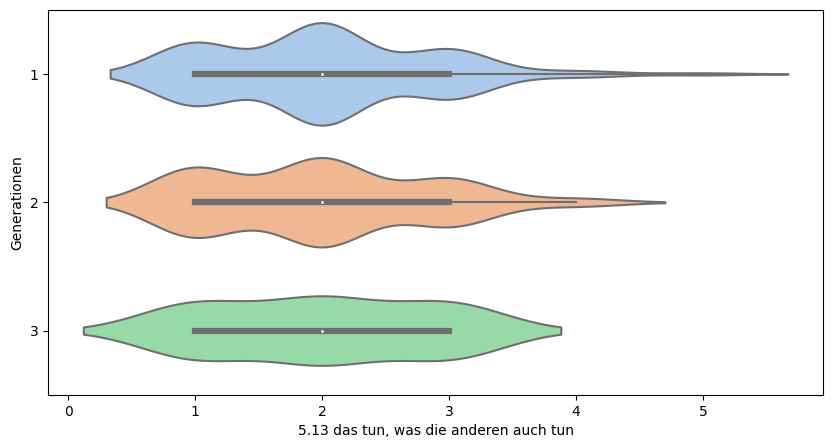

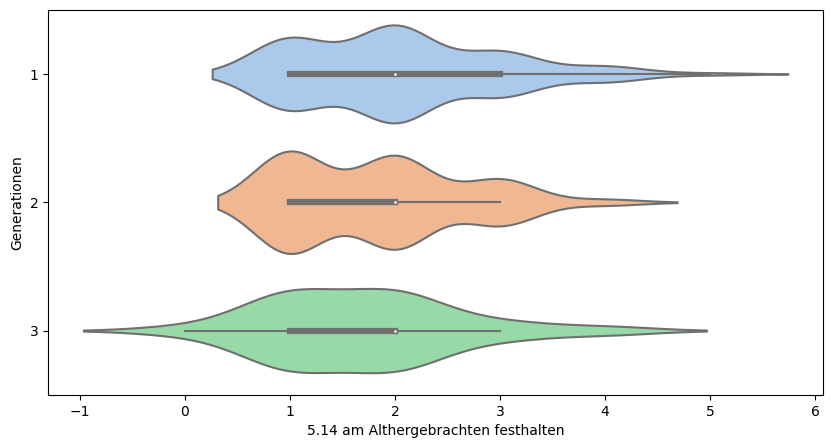

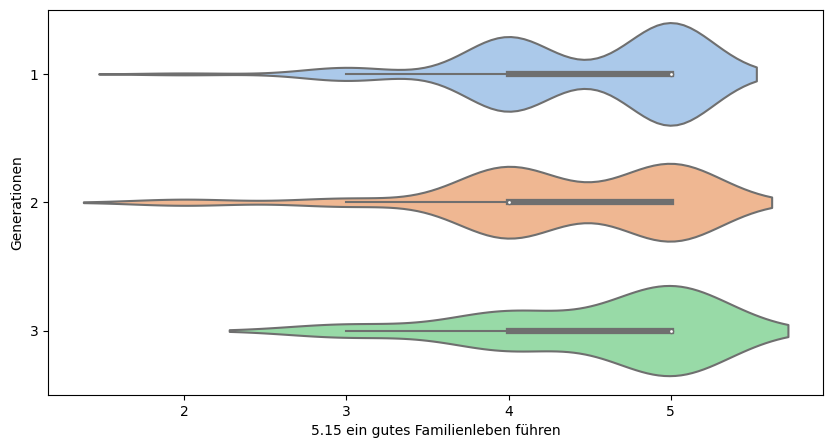

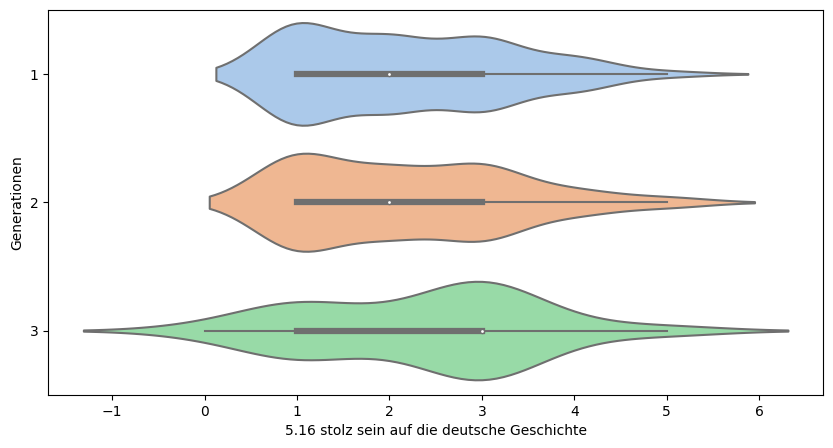

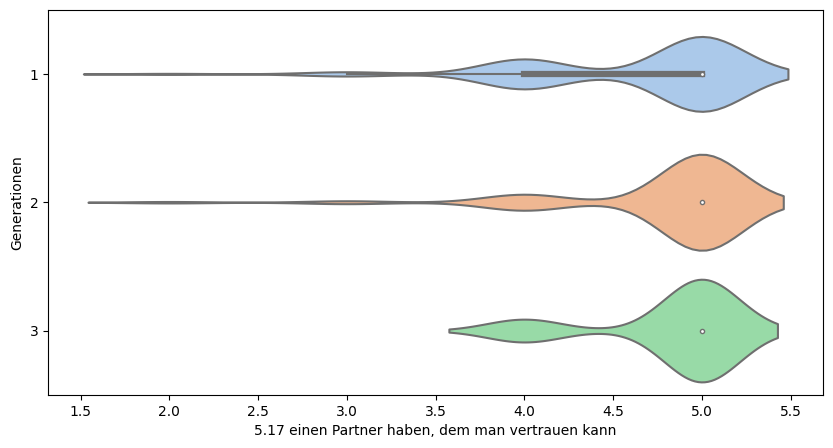

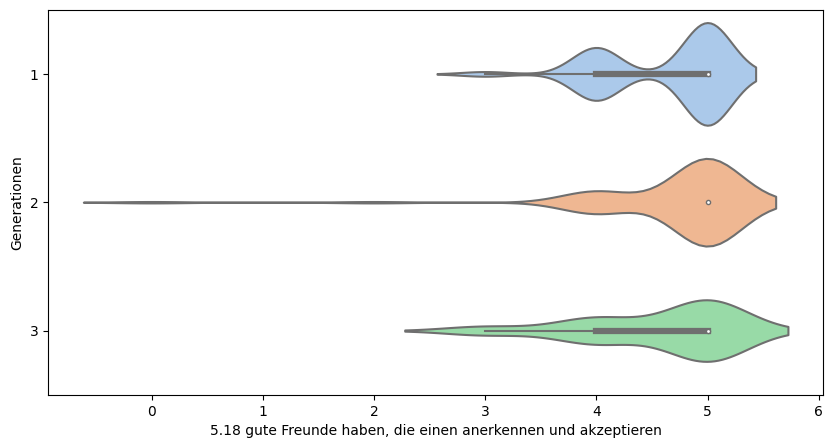

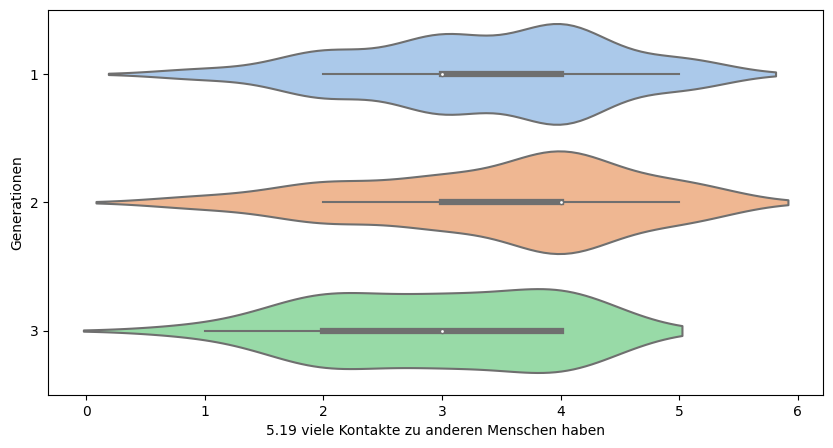

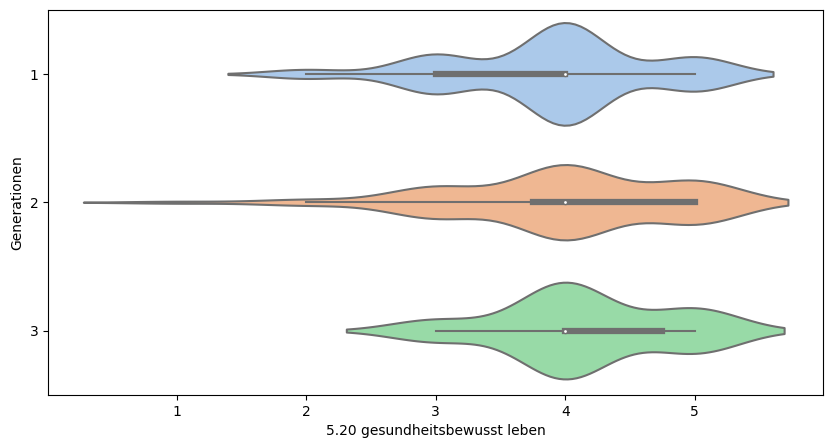

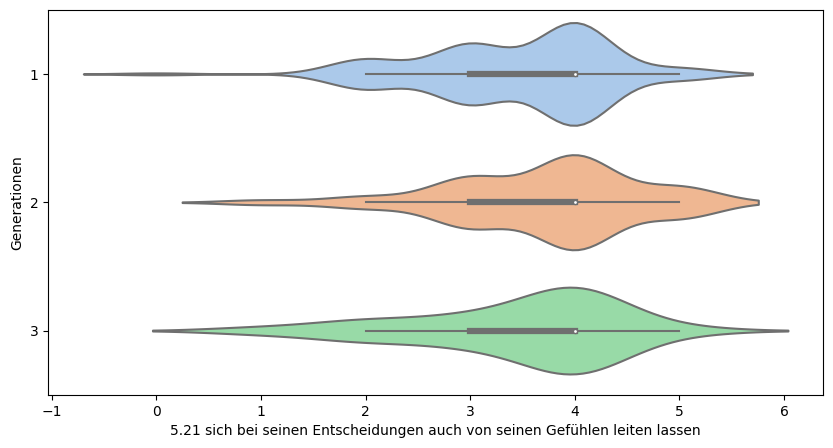

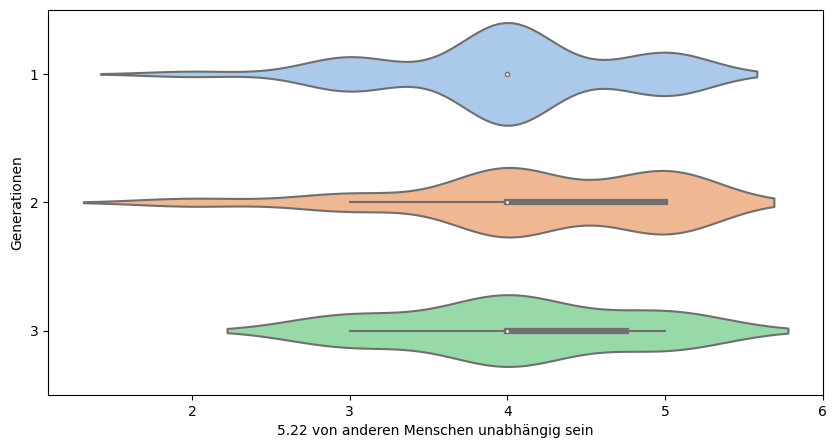

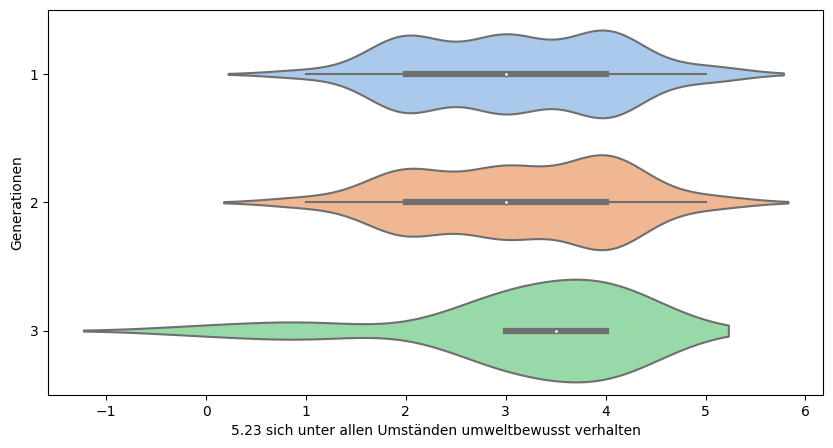

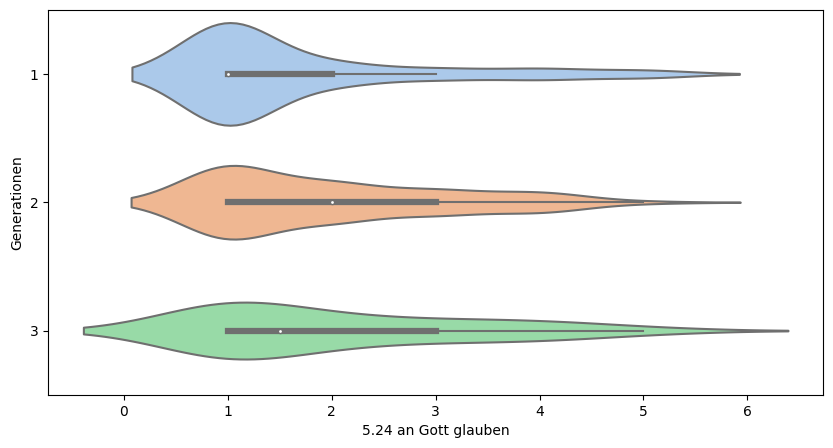

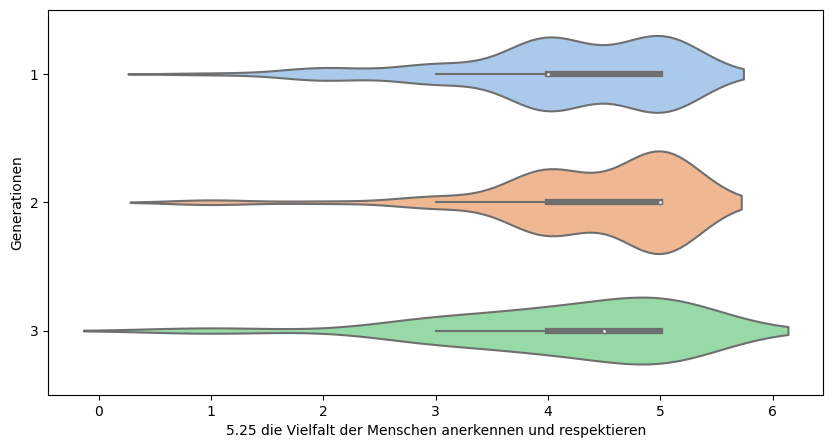

In [148]:
for col in skala_fach_ids:
    plot_violin(col, "skala")

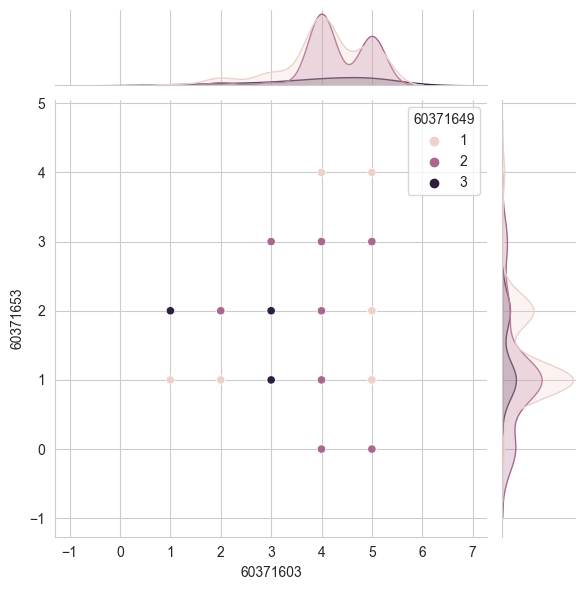

In [351]:
sns.jointplot(data=df_results, x='60371603', y=work_form_col, hue=generation_col)

## 3. Gruppenvergleiche - Statistische Signifikanz

In [178]:
question_code = '60371600'
gen_y = df_results[df_results[generation_col] == 1][question_code] 
gen_z = df_results[df_results[generation_col] == 2][question_code]
other_gen = df_results[df_results[generation_col] == 3][question_code]

**Mann-Whitney-Tests Vorrausstezungen**

- **Unabhängigkeit der Messungen.** Dies ist eine der wichtigsten Voraussetzungen des Mann-Whitney-U-Tests. Messungen sind dann unabhängig, wenn der Messwert aus einer Gruppe nicht abhängt oder beeinflusst wird durch den Messwert aus einer anderen Gruppe. Gewinnt man seine Messdaten von Menschen, ist diese Bedingung meistens bereits erfüllt, wenn kein Teilnehmer aus einer Gruppe auch in der anderen Gruppe vorkommt. Daher befinden sich in jeder Gruppe unterschiedliche Personen. Auch wenn man Personen nach Geschlecht, Alter oder Bildungsabschluss aufteilt, wären die Personen in jeder Gruppe andere und diese Voraussetzung wäre erfüllt.
- **Die unabhängige Variable ist nominalskaliert und hat zwei Ausprägungen.** Wir erwarten, dass unsere unabhängige Variable kategorial ist, daher nominalskaliert, mit zwei verschiedenen Ausprägungen. Die Einteilung kann auf natürliche Weise zustande gekommen sein (wie beispielsweise bei Geschlecht) oder künstlich (wie beispielsweise die Einteilung in verschiedene Altersgruppen). Wichtig ist allerdings, dass die Gruppen unabhängig voneinander sind.
- **Die abhängige Variable ist mindestens ordinalskaliert.** Die abhängige Variable sollte mindestens ordinalskaliert sein. Beispiele für ordinalskalierte Variablen sind Ranglisten (z.B. Top-10 Hitlisten). Streng genommen sind auch Likert-skalierte Items (z.B. Servicezufriedenheit von hoch unzufrieden bis hochzufrieden) auch ordinalskaliert, wobei man aber meist davon ausgeht, dass sie intervalskaliert sind. Andere Beispiele für ordinalskalierte Variablen sind Einstellungswerte, die den Grad der Zufriedenheit oder des Vertrauens darstellen, und Einstellungsbewertungen. Bei intervalskalierten Variablen ist der Abstand zwischen zwei Variablen aussagekräftig, wie z.B. bei Temperaturen, die in Celsius gemessen werden, Zeit, Gewicht und IQ.
- **Die Verteilungsform der beiden Gruppen ist (etwa) gleich.** Auch wenn der Mann-Whitney-U-Test keine expliziten Vorgaben bezüglich der Verteilung macht (z.B. normalverteilte Variablen), sollten die Formen der Verteilungen in beiden Gruppen etwa gleich sein. (Für weitere Informationen empfehlen wir Eid, Gollwitzer und Schmitt [2017]). Ansonsten ändert sich die Interpretation des Tests. Allerdings: Auch wenn die Verteilungsform nicht gleich ist, können wir die Ergebnisse weiterhin interpretieren.


<Axes: >

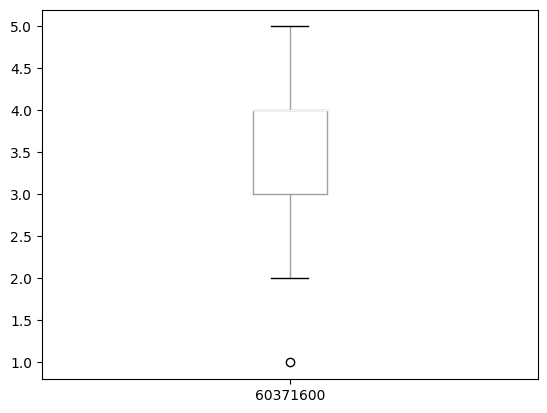

In [179]:
df_results[df_results[generation_col] == 1].boxplot(column=[question_code], grid=False)

<Axes: >

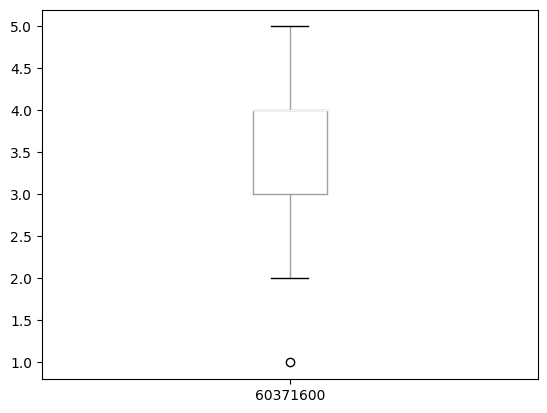

In [180]:
df_results[df_results[generation_col] == 2].boxplot(column=[question_code], grid=False)

In [181]:
shapiro_df[shapiro_df["question_id"] == question_code][["statistic_gen_y", "pvalue_gen_y"]]

statistic_gen_y  pvalue_gen_y
3         0.883374  1.817371e-07

In [182]:
shapiro_df[shapiro_df["question_id"] == question_code][["statistic_gen_z", "pvalue_gen_z"]]

statistic_gen_z  pvalue_gen_z
3         0.869462  7.752865e-07

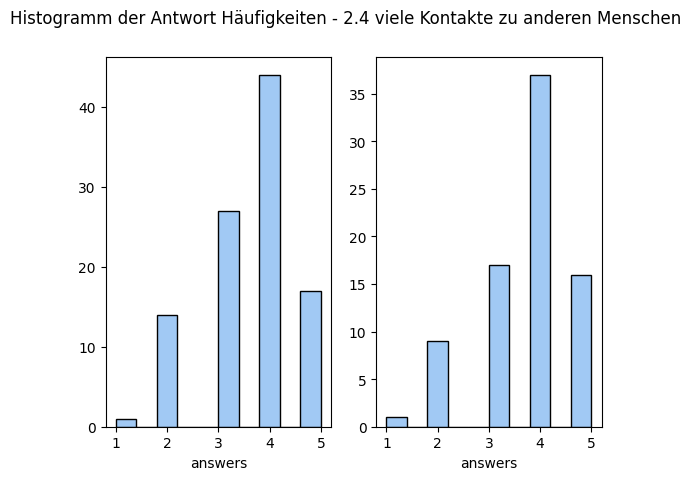

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle(f'Histogramm der Antwort Häufigkeiten - {get_question_text(question_code)}')
ax1.hist(gen_y, bins=10, histtype='bar', ec='k') 
ax2.hist(gen_z, bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("answers")
ax2.set_xlabel("answers")
plt.show()

In [184]:
stats.ks_2samp(gen_y, gen_z)

KstestResult(statistic=0.07026699029126214, pvalue=0.9631565577093685, statistic_location=3, statistic_sign=1)

In [185]:
stats.mannwhitneyu(gen_y, gen_z, alternative='two-sided')

MannwhitneyuResult(statistic=3803.0, pvalue=0.3456754964827883)

Null- und Alternativhypothesen:

H 0: Im Median ist die Relevanz vieler Kontakte zu anderen Menschen zwischen den Generationen Y und Z gleich

H A: Im Median ist die Relevanz vieler Kontakte zu anderen Menschen zwischen den Generationen Y und Z nicht gleich

Ein Mann-Whitney-U-Test wurde berechnet um zu überprüfen, ob sich die Relevanz vieler Kontakte zu anderen Menschen für Generation Y und Z unterschied. Die Verteilungen der beiden Gruppen unterschieden sich nicht von einander, Kolmogorov-Smirnov p > .05. Es gab keinen signifikanten Unterschied der Mediane der Relevanz guter Aufstiegsmöglichkeiten zwischen Generation Y und Z, U = 3803.0, p < 0.345675.

In [186]:
display(gen_z.median())
display(gen_z.describe())

4.0

count    80.000000
mean      3.725000
std       0.954337
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: 60371600, dtype: float64

In [187]:
display(gen_y.median())
display(gen_y.describe())

4.0

count    103.000000
mean       3.601942
std        0.953218
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: 60371600, dtype: float64

**Kruskal-Wallis-Tests Vorrausstezungen**

Um einen Kruskal-Wallis-Test zu berechnen, müssen lediglich mehrere unabhängige Zufallsstichproben mit zumindest ordinalskalierten Merkmalen vorliegen. Die Variablen müssen keine Verteilungskurve erfüllen. 

Gegeben:
- **Ordinale oder kontinuierliche Antwortvariable**. Die Antwortvariable sollte eine ordinale oder kontinuierliche Variable sein. Ein Beispiel für eine Ordnungsvariable ist eine Frage zur Beantwortung einer Umfrage, die auf einer Likert-Skala gemessen wird (z. B. eine 5-Punkte-Skala von „trifft überhaupt nicht zu“ bis „trifft voll zu“). Ein Beispiel für eine kontinuierliche Variable ist das Gewicht (z. B. gemessen in Pfund).
- **Unabhängigkeit**. Die Beobachtungen in jeder Gruppe müssen unabhängig voneinander sein. Normalerweise kümmert sich ein randomisiertes Design darum.
- **Verteilungen haben ähnliche Formen**. Die Verteilungen in jeder Gruppe müssen eine ähnliche Form haben.

In [188]:
shapiro_df[shapiro_df["question_id"] == question_code][["statistic_gen_z", "pvalue_gen_z"]]

statistic_gen_z  pvalue_gen_z
3         0.869462  7.752865e-07

In [189]:
shapiro_df[shapiro_df["question_id"] == question_code][["statistic_gen_y", "pvalue_gen_y"]]

statistic_gen_y  pvalue_gen_y
3         0.883374  1.817371e-07

In [190]:
shapiro_df[shapiro_df["question_id"] == question_code][["statistic_other_gen", "pvalue_other_gen"]]

statistic_other_gen  pvalue_other_gen
3             0.886086          0.015817

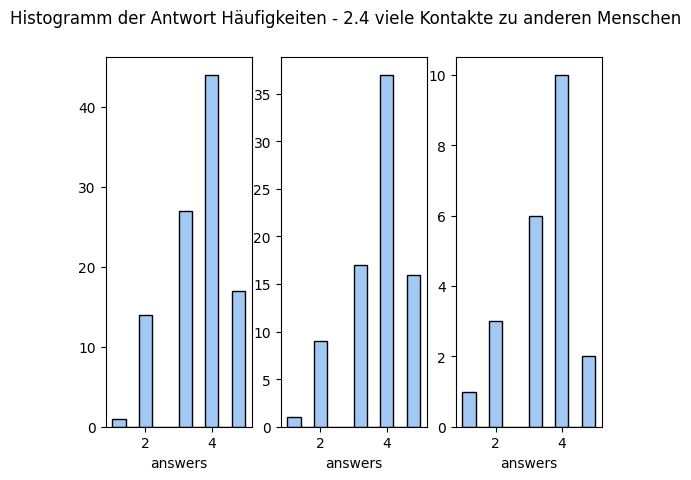

In [191]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle(f'Histogramm der Antwort Häufigkeiten - {get_question_text(question_code)}')
ax1.hist(gen_y, bins=10, histtype='bar', ec='k') 
ax2.hist(gen_z, bins=10, histtype='bar', ec='k') 
ax3.hist(other_gen, bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("answers")
ax2.set_xlabel("answers")
ax3.set_xlabel("answers")
plt.show()

In [192]:
stats.kruskal(gen_y, gen_z, other_gen)

KruskalResult(statistic=2.0064710143875235, pvalue=0.3666910880922534)

Null- und Alternativhypothesen:

H 0: Im Median ist die Relevanz vieler Kontakte zu anderen Menschen zwischen den Generationen Y, Z und Others gleich

H A: Im Median ist die Relevanz vieler Kontakte zu anderen Menschen zwischen den Generationen Y, Z und Others nicht gleich

Da der p-Wert ( .36669 ) nicht weniger als 0,05 beträgt, können wir die Nullhypothese nicht ablehnen. Wir können somit keine Aussage über die statistische Signifikanz der Relevanz vieler Kontakte zu anderen Menschen in den verschiedenen Generationen schließen.

**ANOVA**

- **Unabhängigkeit der Messungen.** Dies ist eine der wichtigsten Voraussetzungen der einfaktoriellen ANOVA. Messungen sind dann unabhängig, wenn der Messwert einer Gruppe nicht abhängt oder beeinflusst wird durch den Messwert aus einer anderen Gruppe. Gewinnt man seine Messdaten von Menschen, ist diese Bedingung meistens bereits erfüllt, wenn kein Teilnehmer aus einer Gruppe auch in einer anderen Gruppe vorkommt. Daher befinden sich in jeder Gruppe unterschiedliche Personen. Auch wenn man Personen nach Geschlecht, Alter oder Bildungsabschluss aufteilt, wären die Personen in jeder Gruppe andere.
- **Die abhängige Variable ist mindestens intervallskaliert.** Das Skalenniveau ist wichtig, da die Formel der ANOVA vorsieht, dass wir verschiedene mathematische Operationen durchführen, die wir erst ab einer intervallskalierten Variablen durchführen dürfen. Beispiele für intervallskalierte Variablen sind: Zeit (z.B. Alter, Reaktionszeiten, Zeitmessungen), Größe, Gewicht, Temperatur, Geld, IQ, Anzahl von … (z.B. Studenten, Kaffee pro Tag), Konzentrationen (z.B. Hormone, Mineralien, Eiweiße).
- **Die unabhängige Variable ist unabhängig und nominalskaliert.** Wir erwarten, dass unsere unabhängige Variable kategorial ist, daher nominalskaliert. Die Einteilung kann auf natürliche Weise zustande gekommen sein (wie beispielsweise bei Geschlecht) oder künstlich (wie beispielsweise die Einteilung in verschiedene Altersgruppen). Wichtig ist allerdings, dass die Gruppen unabhängig voneinander sind.
- **Die abhängige Variable ist für jede Gruppe (etwa) normalverteilt.** Als parametrisches Verfahren liefert die einfaktorielle ANOVA die am besten zu interpretierenden Ergebnisse, wenn die abhängige Variable in jeder Gruppe etwa normalverteilt ist. Allerdings gibt es bei dieser Regel viele Ausnahmen, die zu beachten sind. Viele Textbücher empfehlen zwar sofort den Einsatz anderer statistischer Verfahren, sollte diese Voraussetzung nicht erfüllt sein, jüngere Simulationsstudien zeigen hier allerdings, dass die einfaktorielle ANOVA robust ist gegen die Verletzung dieser Annahme.
- **Es befinden sich keine Ausreißer in den Gruppen.** Die meisten parametrischen Statistiken sind nur wenig robust gegenüber Ausreißern, also Werte die sich weit entfernt von der Masse der anderen Werten befinden. Ein einziger Ausreißer kann bereits ein sonst signifikantes Ergebnis nicht signifikant werden lassen. Daher ist es besonders wichtig, die Daten auf Ausreißer zu überprüfen.
- **Die Varianzen in jeder Gruppe sollten (etwa) gleich sein (Homoskedastizität).** Die Varianz spielt eine große Rolle bei der ANOVA (immerhin steht das V in ANOVA für Varianz). Liegen die Varianzen der einzelnen Gruppe zu weit voneinander entfernt, erhöht sich die Wahrscheinlichkeit, einen Fehler erster Art zu begehen. Allerdings gibt es auch hier Korrekturmöglichkeiten, sollte diese Voraussetzung nicht erfüllt sein.
